## Nick Jones
## DSC 478
## Final Project: Data Analysis of the European Soccer Database

Before we begin any of our data mining tasks, we first must pre-process our data. The dataset, we are using comes from Kaggle and can be viewed here: https://www.kaggle.com/hugomathien/soccer

We end up talking about this dataset in detail in the section a couple of cells below labeled "Introuding the European Soccer dataset". 

Below we have multiple import statements, showing some of the various packages we will be using for pre-processing. Obviously we have some common ones such as pandas, numpy, and matplotlib. We also will be using sqlite3 in our pre-processing. Since our dataset contains SQL tables, we will be using the sqlite package which allows us to use SQL statements in python so we can extract the various rows and columns from our European soccer dataset

In [1]:
# Import statements for various packages we will be using for pre-processing and exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline 

Since we have our dataset/database files stored somewhere in our given computer, we store its file path in a variable called path

In [1]:
# Set the file path so we can know which sql databases we need to pull our data from
path = r'C:\Users\Owner\Documents\DSC 478\database.sqlite'

Then we have to create an object which will represent/store our database of European soccer data. We use the connect function and pass it the path variable we created in the cell above. We then store the output of the connect function into a variable called db. 

To show that we were able to connect successfully, we print out that we had a successful connection along with the database object db, which again represent the European soccer database we are working with

In [3]:
# Call the connect function from sqlite3 in order to connect to our database
db = sqlite3.connect(path)
print("Connection Successful",db)

Connection Successful <sqlite3.Connection object at 0x7ffbaef653b0>


## Introducing the European Soccer dataset: 

In our dataset, there are seven total SQL tables. Each of these respective tables help us something about the 9 seasons of European soccer data that was collected.

First, we have the Country table, which tells us the 11 different European countries in which the data was collected from. Each row has a unique country ID along with the name of the country itself. 

Second, we have the League table, which tells us about the 11 domestic European soccer leagues from which the data is from. Again each row has a unique league ID along with the name of that given league. We also have the country ID in this table as well to show us which country that league is from. 

Third, we have the Match table. This is one of our biggest tables in the dataset and contains over 26,000 rows. Each row represents a different game that took place in each of the 11 domestic European soccer leagues. Here we have over 115 columns in this table. Some of the attributes/columns include: unique match id, date in which the game took place, which season the game took place in (since seasons take place over two years), the id of the home team, id of the away team, along with how many goals the away and home teams scored. We also get more information about the game itself like how many shots each team took. 

Fourth, we have the Player table. This has standard information about a player such as their name, birthdate, own unique ID number, height, weight. 

Fifth, we have the Player Attributes table. This also has information about a player and has a column which shows their unique ID which we got from the Player table. But here we also get more attributes that talk about how well a player is on the pitch. We get information such as which foot they prefer to shoot with, how good they are at passing, shooting, dribbling, sprinting, reaction speed, and other such player characteristics/skill ratings. Essentially this data table tells about how well a player is at a given part of a soccer game. Looking through the dataset, we see that different players are good at different parts of the game and using our background knowledge of the sport, we can usually tell about where a given player plays on the pitch given their attributes. For example, a player that is really good at intercepting the ball and defending is most likely a defender while a player who can dribble and shoot well is most likely a forward/striker. There is also a date column, which tells in which year was this given data recorded for that player. 

Since each player can play multiple seasons, there are multiple rows in this data table per player. For example if a player plays in 2009, 2010, and 2011, they will subsequently have 3 different rows. This is because their attributes and skill ratings can change from year to year. In some shape or another, most soccer players skills do change from year to year in terms of how well they can do a certain thing on the pitch. So having a row for a given player in a given seasons, helps us see that change if we ever wanted to look at how much a player has changed over the course of their career. 

Sixth, we have the Team table. This table shows a unique team ID along with its ID in the EA Sports video game series "FIFA". We are also given the name of the team along with a abbreviation of it as well. This abbreviation would be something like the ones you see on a scoreboard when watching soccer on the TV. 

Note: We also have unique IDs for players as well that are from the "FIFA" video game series as well. So in the Players and Player Attributes tables, we have columns that show a players unique FIFA ID along with the column that shows their unique player ID. Essentially each player has two IDs. One for their play in real life and the other for FIFA, the video game. 

Finally, our seventh table is the Team Attributes table. This is like the Player Attributes table, but obviously for teams. We have over 20 columns in this table that tell us how about how a given team plays in a given season. Again, we have a different row for a soccer team in a given season. Teams could switch personnel such as players and managers during the season and in the offseason. So their playing styles may change depending on who is in charge of the tactics. This is why we have one row per season for a given team, meaning we have multiple rows per soccer club. 

So we have characteristics about a team such as how quickly they build up their offense, how quickly they pass, how quickly they dribble and cross the ball along with other attributes such as how good they are at defense. Each attribute/characteristic about a teams play has a categorical column along with a numerical column for that characteristic as well. For example if we have a column that talks about a teams crossing, we will have two columns. One gives a numerical value while the other column gives a categorical attribute. Most categorical attributes in this table has varying category levels such as "low", "high", and "medium". 

So in the cell below, we call the names of all of our tables. We use the pandas function, read_sql() and pass it two parameters. First parameter is the SQL call to pull the names of all of the seven tables in our database. Second parameter is the database itself. We store this output in the tables variable

We then call the display function to show all of the seven tables we are working with

In [4]:
#view of all tables in database
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""",db)
display(tables)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...
8,table,match_league,match_league,3,"CREATE TABLE ""match_league"" (\n""index"" INTEGER..."
9,table,attribute_imp,attribute_imp,307755,"CREATE TABLE ""attribute_imp"" (\n""index"" INTEGE..."


Above, we can see the names of each of the tables we will will be working with. We have two extra tables at the bottom which we created during our data exploration process called match_league and attribute_imp. We made these in an effort to combine some of the data tables that were in the original data set. They were part of a trial and error process of trying to combine data tables together in order to find interesting trends in the data itself. 

## Data Preprocessing and Exploration

Now we will begin the pre-proessing and exploration process. 

First, we want to see what values we have in the Country and League tables. So we use the pandas function called read_sql. We call it twice, once for each table. Each time we call the read_sql function, we pass it two parameters. The first parameter is the SQL code to pull all of the information from that given table and the second parameter is the database object itself (db). We store the outputs in the countries and leagues variables respectively. Each of these outputs are stored into pandas dataframes.

We then call the display function to show the two tables

In [5]:
#Viewing our smaller countries and leagues tables
countries = pd.read_sql("""SELECT *
                           FROM Country;""", db)


leagues = pd.read_sql("""SELECT id, name
                     FROM League;""", db)
display(countries)
display(leagues)

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


,id,name
0,1,Belgium Jupiler League
1,1729,England Premier League
2,4769,France Ligue 1
3,7809,Germany 1. Bundesliga
4,10257,Italy Serie A
5,13274,Netherlands Eredivisie
6,15722,Poland Ekstraklasa
7,17642,Portugal Liga ZON Sagres
8,19694,Scotland Premier League
9,21518,Spain LIGA BBVA


Above, we can see the 11 European countries that are in the countries table. We will be using soccer data from domestic leagues from each of these given countries. We also see the unique country ID in the table as well. We have major European countries in this list including countries that have recently won the World Cup such as Spain, Germany, and France. Obviously this data set only has domestic data and not any from international tournaments but it is someting worth noting 

Second, we have the names of the 11 respective leagues in the leagues table. Here we pulled the name of the given league and the id of the country that it's based in. For example, we can see that the English Premier League has the id 1729, which corresponds with England. So we can obviously conclude that this is where that given league is played. Likewise we can say the same for Ligue 1 in France, Serie A in Italy, Eredivise in the Netherlands and so on. 

Next, we will use the read_sql function again to pull the data from the Match table in order to see how it looks in Pandas. We store the output of our function in a variable called matches. 

Since matches is a huge table with a lot of rows and columns, we just call the head function before the display function to take a look at the first five rows of the given table. 

In [6]:
#viewing larger matches table by calling the read_sql function
matches = pd.read_sql("""SELECT *
                       FROM match;""", db)

# Displaying the head of the matches table
display(matches.head())

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


### Looking at goals per season in the top five European Soccer Leagues

Next we want to do a bit of exploration into our dataset. Since goals is the main scoring metric in any soccer game, we want to pull some information out about goal scoring in Europe's top five soccer leagues (England, Italy, Spain, France, Germany), explore it, and draw some takeaways.  

Again we use the read_sql function and pass it an SQL command which gets us goal tally numbers for a given domestic Euoropean soccer league in a given season. So each row in our data set will be a given season for a given league. We get the total number of games played per season (some countries don't play 38 games such as the Bundesliga in Germany) along with how many teams are in that given league (again Germany only has 18 teams in their domestic league while Scotland has 12 and Switzerland has 10). We also get counts of how many goals were scored by the home team and how many goals were scored by the away teams in that given season. We also grab the total amount of goals per season. 

We then have three columns showing the average goals scored by the home team and away team plus the average goal differential along with the average goals per game that were scored in a given season. 

To do this, we combine the Match, Country, and League tables. We then also set it to the top five European soccer countries so we only get data for those five legues respectively. 

We then call display() to show this table. It's ordered by the name of the country. 

Note: since we only have one league per country in our table, we felt only showing only the country name in the table was sufficient. 

In [7]:
#Goals by season function by using read_sql
goals_by_season = pd.read_sql("""SELECT Country.name AS country_name,  
                                        season,
                                        count(distinct stage) AS games,
                                        count(distinct home.team_long_name) AS teams,
                                        sum(home_team_goal) AS home_goals,
                                        sum(away_team_goal) AS away_goals,
                                        sum(home_team_goal+away_team_goal) AS total_goals,
                                        avg(home_team_goal) AS avg_home_goals, 
                                        avg(away_team_goal) AS avg_away_goals, 
                                        avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                        avg(home_team_goal+away_team_goal) AS avg_goals
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS home on home.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS away on away.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Spain', 'England', 'Italy', 'Germany', 'France')
                                GROUP BY Country.name, League.name, season
                                ORDER BY Country.name, League.name, season DESC;""", db)
display(goals_by_season)

,country_name,season,games,teams,home_goals,away_goals,total_goals,avg_home_goals,avg_away_goals,avg_goal_dif,avg_goals
0,England,2015/2016,38,20,567,459,1026,1.492105,1.207895,0.284211,2.700000
1,England,2014/2015,38,20,560,415,975,1.473684,1.092105,0.381579,2.565789
2,England,2013/2014,38,20,598,454,1052,1.573684,1.194737,0.378947,2.768421
3,England,2012/2013,38,20,592,471,1063,1.557895,1.239474,0.318421,2.797368
4,England,2011/2012,38,20,604,462,1066,1.589474,1.215789,0.373684,2.805263
5,England,2010/2011,38,20,617,446,1063,1.623684,1.173684,0.450000,2.797368
6,England,2009/2010,38,20,645,408,1053,1.697368,1.073684,0.623684,2.771053
7,England,2008/2009,38,20,532,410,942,1.400000,1.078947,0.321053,2.478947
8,France,2015/2016,38,20,546,414,960,1.436842,1.089474,0.347368,2.526316
9,France,2014/2015,38,20,536,411,947,1.410526,1.081579,0.328947,2.492105


Looking at the table above we can see that most countries average around three goals a game in a given season. The highest goal per game rate in the table is the 2013/14 Bundesliga (Germany) season where 3.1 goals were scored on aveage. As we scroll down the dataset, we can see how the goal tallies and statistics have changed over the years for each individual league. For example, we can see that Spain has maintained a really high goals per game rate as it's value has been hovering around 2.7 to 2.8. 

We can also see which countries score the most goals in their respective domestic leagues. We can see that in La Liga (Spain), they score a lot more goals than they do in the Serie A (Italy). In the dataset, Spain's top domestic league has scored over 1,000 goals in a season in all eight years that the dataset covers. Italy has only done that three times while neither Ligue 1 (France) and the Bundesliga (Germany) have done it at all in those given eight seasons. 

We also notice that the Premier League has hit the 1,000 goals per season tally quite a lot in the dataset and after a down year in 2014/15 which saw English teams only score a combined 957 goals, the league bounced back with 1,026 goals scored in 2015/16. 

Overall, we can see that we have a lot of data to work with and that even by grouping a simple metric such as goals, it can tell us a lot about the top five European soccer leagues in terms of how good each league is at scoring. On the flip side, we can also tell which leagues have more sturdy and rigid defenses, hence making it harder to put the ball in the back of the net.

### Pre-Processing the Matches Table

Now when we looked at the matches dataset a bit above and see that there is a lot of rows in that given dataset. We want to explore more into this and see if we have to do any pre-processing:

So first we used SQL statements to pull out all of the matches and some of their respective statistics/attributes about that given match. Since our original database has 115 columns for the Match table, we decided to only take a small subset of that since we wouldn't be using every single attribute. We ended up taking columns that we thought were useful to look at when analzying a certain match. So as a group we decided to take out common game statistics you would see on a broadcast when the stats about a game is shown or when you look up the box score of a given game. 

We took the given season, what matchday or gameweek that game took place in, names of the teams, how many goals were scored, how shots were taken both on and off target along with fouls commited, and cards issued. We also pulled out the number of crosses and corners taken in the game as well. We also have possession stats for each team listed as well. 

We store this resulting table in a variable called ReducedMatches. Again we only show the head since there are a ton of rows

In [8]:
#Reduced database of the matches function to possibly use
ReducedMatches = pd.read_sql("""SELECT Country.name AS country_name,
                            season,
                            stage,
                            home.team_long_name AS  home_team,
                            away.team_long_name AS away_team,
                            home_team_goal AS home_goals,
                            away_team_goal AS away_goals,
                            goal,
                            shoton,
                            shotoff,
                            foulcommit,
                            card,
                            cross,
                            corner,
                            possession
                        FROM Match
                        JOIN Country on Country.id = Match.country_id
                        JOIN League on League.id = Match.league_id
                        LEFT JOIN Team AS home on home.team_api_id = Match.home_team_api_id
                        LEFT JOIN Team AS away on away.team_api_id = Match.away_team_api_id
                        ORDER by season;""", db)
display(ReducedMatches.head())

,country_name,season,stage,home_team,away_team,home_goals,away_goals,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
0,Belgium,2008/2009,1,KRC Genk,Beerschot AC,1,1,None,None,None,None,None,None,None,None
1,Belgium,2008/2009,1,SV Zulte-Waregem,Sporting Lokeren,0,0,None,None,None,None,None,None,None,None
2,Belgium,2008/2009,1,KSV Cercle Brugge,RSC Anderlecht,0,3,None,None,None,None,None,None,None,None
3,Belgium,2008/2009,1,KAA Gent,RAEC Mons,5,0,None,None,None,None,None,None,None,None
4,Belgium,2008/2009,1,FCV Dender EH,Standard de Liège,1,3,None,None,None,None,None,None,None,None


Now time for some data pre-processing. First we call isnull() and sum() so we can see how many nulll values are in each of the columns we have in the ReducedMatches dataset. 

Below we see that in the goals, shots on target, shots off target, fouls commited, cards issues, crosses, corners, and possession columns that we have 11,762 null values. 

It's also worth noting that we have no null values for the rest of the respective columns in our table. So seeing that there are columns that have a ton of null values, they might not be useful to us when it comes to data exploration. So we have to do something about all of those null values

In [9]:
#checking for nulls using isnull() and sum()
ReducedMatches.isnull().sum(axis=0)


country_name        0
season              0
stage               0
home_team           0
away_team           0
home_goals          0
away_goals          0
goal            11762
shoton          11762
shotoff         11762
foulcommit      11762
card            11762
cross           11762
corner          11762
possession      11762
dtype: int64

So we make the decision to drop the columns that have null values in it by calling the dropna() function and passing the columns into the axis parameter. This drops the columns that have nulls in it. We store this new table into a variable called ReducedMatches_imp then call info() on it to show that we have in fact dropped those 8 columns which had null values in them. 

Then in the corresponding next cell, we call sum function along with is.null() to show that we have no null values in any of our columsn in the ReducedMatches table anymore. 

In [10]:
#drop nulls
ReducedMatches_imp = ReducedMatches.dropna(axis='columns')
print(ReducedMatches_imp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_name  25979 non-null  object
 1   season        25979 non-null  object
 2   stage         25979 non-null  int64 
 3   home_team     25979 non-null  object
 4   away_team     25979 non-null  object
 5   home_goals    25979 non-null  int64 
 6   away_goals    25979 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.4+ MB
None


In [11]:
#Check for duplicates and drop
ReducedMatches_imp.isnull().sum()

country_name    0
season          0
stage           0
home_team       0
away_team       0
home_goals      0
away_goals      0
dtype: int64

Next, we wanted to explore and test out what happens if we combine two of our tables in SQL which would create a combined table called match_league. Again we use the read_sql function to create a combined match and league table, pulling columns from those two individual data tables respectively. 

But then we use the to_sql function to put this table into our database object db, essentially adding it to the list of data tables have.

### Note: We ended up not using this table in any of our data mining tasks but we still felt it was an important part of our data pre-processing and exploration process to include it. 

In [12]:
#Combined matches and leagues tables
match_league = pd.read_sql("""SELECT m.country_id,lg.name,m.season,m.stage,m.date,m.match_api_id,m.home_team_api_id,m.away_team_api_id,m.home_team_goal,m.away_team_goal
                              FROM match m
                              JOIN league lg
                              ON m.league_id = lg.id""",db)
match_league.to_sql("match_league", db, if_exists="replace")
print(match_league.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country_id        25979 non-null  int64 
 1   name              25979 non-null  object
 2   season            25979 non-null  object
 3   stage             25979 non-null  int64 
 4   date              25979 non-null  object
 5   match_api_id      25979 non-null  int64 
 6   home_team_api_id  25979 non-null  int64 
 7   away_team_api_id  25979 non-null  int64 
 8   home_team_goal    25979 non-null  int64 
 9   away_team_goal    25979 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 2.0+ MB
None


Next was our second attempt of trying to create a new combined data table in order to make it easier to use if we needed it later on. This time instead of matches we focused on the player and player attribute tables. 

Again we used read_sql and in our SQL command we pulled out a players birthday, what specific season we are pulling their stats for, ID, name, acceleration, sprint_speed, stamina, agiliy, reaction speed, along with what foot they prefer to shoot the ball with. We stored the output in the attribute variable. 

We did some pre-processing here and changed the date and birthday columns to actual dates by using pandas function to_datetime() function.

After changing up those two columns, we create the attribute_imp table by using the to_sql function. 

We then calll info to show the data types of each of our columns and we can see that in fact, date and birthday are both now datetime variables. 

In [13]:
#Player attributes
attribute = pd.read_sql("""SELECT pa.date,pl.birthday,pl.player_api_id,pl.player_name,pa.acceleration,pa.sprint_speed,pa.stamina,pa.agility,pa.reactions,pa.preferred_foot
                           FROM player pl
                           JOIN player_Attributes pa
                           ON pl.player_api_id = pa.player_api_id;""",db)
attribute['date'] = pd.to_datetime(attribute['date'])
attribute['birthday'] = pd.to_datetime(attribute['birthday'])

attribute.to_sql("attribute_imp",db,if_exists="replace")
attribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            183978 non-null  datetime64[ns]
 1   birthday        183978 non-null  datetime64[ns]
 2   player_api_id   183978 non-null  int64         
 3   player_name     183978 non-null  object        
 4   acceleration    183142 non-null  float64       
 5   sprint_speed    183142 non-null  float64       
 6   stamina         183142 non-null  float64       
 7   agility         181265 non-null  float64       
 8   reactions       183142 non-null  float64       
 9   preferred_foot  183142 non-null  object        
dtypes: datetime64[ns](2), float64(5), int64(1), object(2)
memory usage: 14.0+ MB


We also know that the player table has one row for a player for a given season. But we want to keep one row per player, keeping their most recent season of statistics. So we use the drop_duplicates function and pass it the player_api_id attribute. This will drop all of the duplicate player rows we have. We also set the keep paramter to first so that it keeps the first row of that given player_api_id that it sees. Since the seasons in the dataset go chronologically backwards (as in the most recent season is at the top for each player), the first row for a given player id is the most recent season that player played (for many it's the 2015/16 season). 

After dropping the duplicates, we also drop any rows that contain NA and then again use the the to_sql method to put it back into our database object called db

In [14]:
#Keeping most recent record of each player
attribute.drop_duplicates(subset=['player_api_id',],keep="first",inplace=True)
attribute.dropna(inplace=True)
attribute.to_sql("attribute_imp",db,if_exists="replace")

attribute

,date,birthday,player_api_id,player_name,acceleration,sprint_speed,stamina,agility,reactions,preferred_foot
0,2016-02-18,1992-02-29,505942,Aaron Appindangoye,60.0,64.0,54.0,59.0,47.0,right
5,2016-04-21,1989-12-15,155782,Aaron Cresswell,79.0,78.0,79.0,78.0,67.0,left
38,2016-01-07,1991-05-13,162549,Aaron Doran,77.0,74.0,66.0,85.0,51.0,right
64,2016-04-21,1982-05-08,30572,Aaron Galindo,33.0,34.0,49.0,62.0,57.0,right
87,2015-12-24,1979-11-08,23780,Aaron Hughes,33.0,31.0,60.0,41.0,68.0,right
...,...,...,...,...,...,...,...,...,...,...
183924,2015-03-06,1979-04-03,26357,Zoumana Camara,53.0,63.0,54.0,62.0,68.0,right
183937,2014-09-18,1986-12-18,111182,Zsolt Laczko,69.0,68.0,77.0,62.0,65.0,left
183953,2011-02-22,1979-04-29,36491,Zsolt Low,71.0,73.0,70.0,59.0,69.0,left
183960,2011-02-22,1981-10-06,35506,Zurab Khizanishvili,66.0,66.0,68.0,56.0,62.0,right


Earlier we had created a pandas dataframe called called goals_per_season and we explored how many goals were scored in a given season in each of Europe's top five soccer leagues (England, France, Spain, Germany, Italy). The next step in our exploration process is to visualize this data. We had created a dataframe earlier and shown it but this time we want to see how many total goals each of these five leagues scored over the 9 seasons of data that was collected in our dataset. 

We will group the goals per country and then visualize this data in a bar chart. 

First we create an empty dataframe called df_total and set up the index as a unique season and have each of the five columns represented a given country. This sets us up with nine rows with each representing a given season and five columns for the five countries/leagues we are looking at. 

We then add values to each of those columsn by calling the list function and going through our goals_per_season dataframe and grabbing the total goals attribute value in each row where the country name fits the given country we are looking for. For example, when we go through all of the goals scored in Ligue 1 (France), we are going through the goals_per_season column, finding all the rows that have France in the country_name attribute and getting that corresponding total_goals attribute for those given eight rows. 

We then store it in the given column by calling .loc() on our df_total dataframe. We do this for England, France, Germany, Italy, and Spain in that order. 

We then display the given dataframe so we can see how total goals were scored in a given season in a given league from 2008/09 to 2015/2016. We can see it's clearly split up by country and overall looks much nicer than our goals_per_season dataframe that we had earlier. 

We then call the display function and in the plot parameter we call sum() on our dataframe, which sums up each of the columns, hence creating our total goals over the set of the eight seasons. We then call the plot function, set the kind parameter to "bar" to make it a bar graph and set the title to "Total Goals"

,England,France,Germany,Italy,Spain
2008/2009,1026,960,866,979,1043
2009/2010,975,947,843,1018,1009
2010/2011,1052,933,967,1035,1045
2011/2012,1063,967,898,1003,1091
2012/2013,1066,956,875,925,1050
2013/2014,1063,890,894,955,1042
2014/2015,1053,916,866,992,1031
2015/2016,942,858,894,988,1101


Total Goals by England, France, Germany, Italy, and Spain


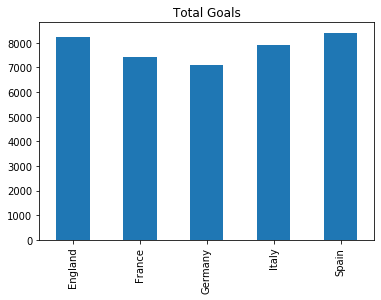

In [15]:

# set up empty dataframe
df_total = pd.DataFrame(index=np.sort(goals_by_season['season'].unique()), columns=goals_by_season['country_name'].unique())
# add values by country
df_total.loc[:,'England'] = list(goals_by_season.loc[goals_by_season['country_name']=='England','total_goals'])
df_total.loc[:,'France'] = list(goals_by_season.loc[goals_by_season['country_name']=='France','total_goals'])
df_total.loc[:,'Germany'] = list(goals_by_season.loc[goals_by_season['country_name']=='Germany','total_goals'])
df_total.loc[:,'Italy'] = list(goals_by_season.loc[goals_by_season['country_name']=='Italy','total_goals'])
df_total.loc[:,'Spain'] = list(goals_by_season.loc[goals_by_season['country_name']=='Spain','total_goals'])

# display dataframe
display(df_total)
# plot totals
print("Total Goals by England, France, Germany, Italy, and Spain")
display(plot = df_total.sum().plot(kind="bar",title="Total Goals"))

As we can see above, we get a good look at which of the top five leagues were the best when it came to scoring goals. We see that Spain and England are the top two with Italy right behind it. This generates a different takeaway than we had when we looked at the goal totals from season to season instead of their total sums like we have here. 

As shown by the graph, Germany and France are the two lowest in terms of total goals scored from the 2008/09 season to the 2015/2016 season. Given a German team plays two less matches per season than their four counterparts, it makes sense why their total goals are lower. It is interesting to see France so low. Especially when we use our background knowledge that France's domestic soccer league, Ligue 1, is known to be a less defensive-minded league than the four others. Many great attacking players come from this league so it was surprising to see them be so low as compared to a league such as the Serie A, which is known for having more defensive minded teams. It would be interesting if our dataset had more recent years to see if the arrival of superstar soccer players such as Neymar and Kylian Mbappe have done anything to increase Ligue 1's total goals scored per season.  

After seeing a bar chart of the totals goals scored per league over the set of the eight seasons in our dataset, we wanted to do another visualization that stems from the goals_per_season dataframe that we created earlier. We want to see how the average goals per game in a given league has changed over time. We did talk about that goals per game trend when we looked at the goals_per_season dataframe but this time we want a visual representation instead of just looking at a big table. 

So the process was similar to when we created the bar chart. We create a dataframe with the unique seasons as rows and the unique countries as rows. We do the same thing where we grab certain column value from rows where the country name is the one we are searching for. This time instead of total goals we are looking for the average goals column instead. This time we add to our new dataframe by pulling average goal values in rows where the country name fits the given country we are looking for. We pull values for Spain, England, Italy, Germany, France in that order. 

We then call the plot function, set the title to "Average Goals Per Game Over Time" and set the x labels to individual seasons, which are the indexes of the given dataframe. We then display it so we can see the plot in its full form.  

Avg. Goals/Game over time for Englad, France, Germany, Italy, and Spain


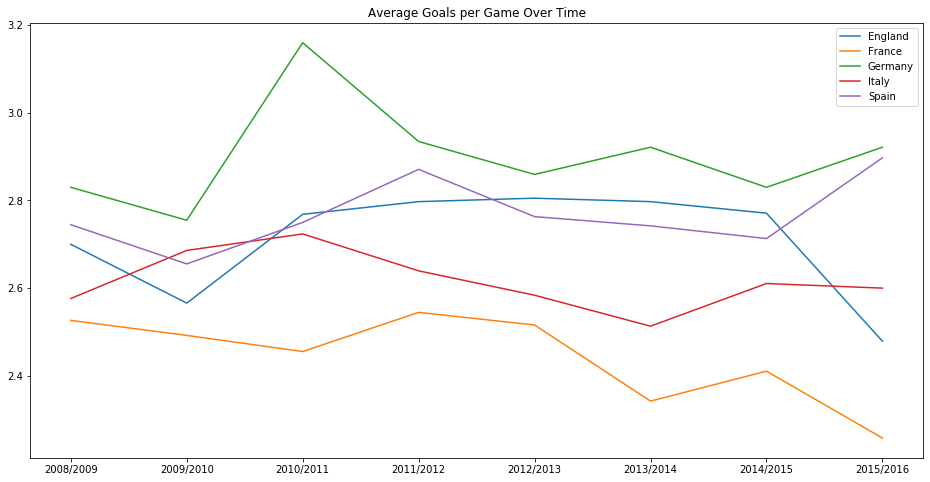

In [16]:
df = pd.DataFrame(index=np.sort(goals_by_season['season'].unique()), columns=goals_by_season['country_name'].unique())

df.loc[:,'Spain'] = list(goals_by_season.loc[goals_by_season['country_name']=='Spain','avg_goals'])
df.loc[:,'England'] = list(goals_by_season.loc[goals_by_season['country_name']=='England','avg_goals'])
df.loc[:,'Italy'] = list(goals_by_season.loc[goals_by_season['country_name']=='Italy','avg_goals'])
df.loc[:,'Germany'] = list(goals_by_season.loc[goals_by_season['country_name']=='Germany','avg_goals'])
df.loc[:,'France'] = list(goals_by_season.loc[goals_by_season['country_name']=='France','avg_goals'])

plot = df.plot(figsize=(16,8), title='Average Goals per Game Over Time')

labels = list(df.index)
plot.set_xticklabels(np.append(np.roll(labels,1),labels[7]))
print("Avg. Goals/Game over time for Englad, France, Germany, Italy, and Spain")
display(plot)

We see positive increases over time to the goals scored per game by Germany and Spain along with no real net change by Italy. However we notice decreases in goals scored over time by England and France. Despite England having scored over a 1,000 goals per season in most of the years of the dataset, they still had a dip in goals per game in the most recent season of the dataset. This could potentially be due to more teams in England being defensive as English teams began to get better across in international European competitions. So since we have a handful of really good teams, this could mean that the rest of the teams are playing defensively when facing these giants in league games. This could lead to the decrease in average goals per game in England. 

France is really interesting as well given background knowledge that the perception of France's league that it's a league where defense isn't really played. This could mean that they are beginning to turn this narrative around and goals are becoming harder to score as the years go on. We saw a rise in the 2014/2015 season but as a whole, their average goals per game has dropped quite a bit. 

I think an interesting hypothesis would be to see if there is any correlation between a talent influx in these countries and these changes in scoring in these countries. Especially France, a country which recently won the World Cup with many of its players not playing in the domestic league. They also have a really talented under-21 squad filled with some of the best young players in world football. But most of those players do leave to play in Spain, England, and Germany. So if we had more time and more data, we would love to test this hypothesis. 

After we looked at the overall league statistics, we wanted to explore the player statistics attributes of the data. So we looked at the Player_Attributes table. We wanted to see how certain attributes correlate to a players overall rating. Since we get these ratings/characteristics of a player from the FIFA video game series, we want to plot certain attributes against the overall to check if a given attribute might help boost or lower a given players rating. We also want to see how certain similar attributes stack up against each other such as a players short and long passing ratings. So we create scatter plots to help answer these given questions we have regarding the player attribute values in our dataset. 

First thing we do is import the seaborn package, which we used to help with the visualization of the four scatter plots we create below. The documentation for this package can be seen here: https://seaborn.pydata.org/. We call the set_style function in order to change the grid color of our given scatter plot to a more darker shade of blue, which will help the data stand out. Also worth noting that per the documentation, darkgrid is the standard for the seaborn package. 

Then we create a pandas dataframe by again calling read_sql. This time we pull the overall rating, potential rating, dribblig, short and long passing plus ball control from the Player_Attributes table. We call this resulting table qu.

We then create four seperate scatter plots, each time calling the plot function on qu and setting the kind parameter to "scatter" to make it a scatter plot. First plot is overall rating against dribbling, second is a players short passing versus their long passing. Third is short passing versus ball control and then finally it's overall rating versus potential. We set appropriate titles using the set_title function. 

Text(0.5, 1.0, 'Overall vs Potential')

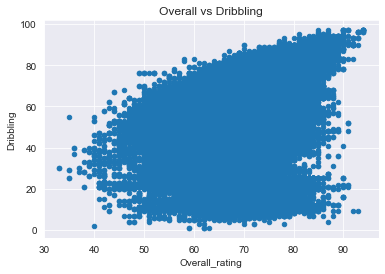

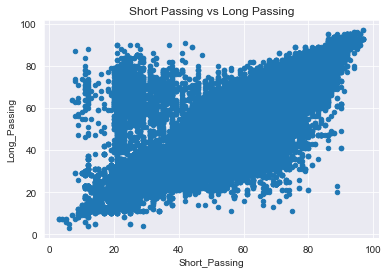

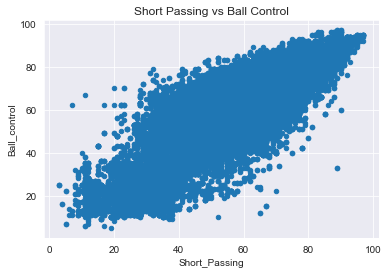

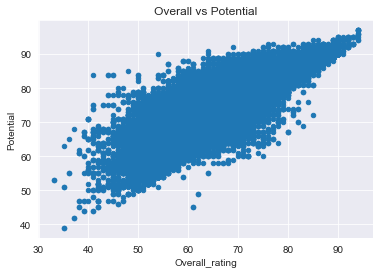

In [17]:
#Some basic preprocessing exploratory viz on the fifa player stats
import seaborn as sns
sns.set_style('darkgrid')
qu = pd.read_sql("""  SELECT overall_rating AS Overall_rating,potential AS Potential, dribbling AS Dribbling,
                        short_passing as Short_Passing, long_passing AS Long_Passing, ball_control AS Ball_control
                        FROM Player_Attributes
                        ORDER BY 1""",db)

ax = qu.plot(x="Overall_rating",y="Dribbling",kind="scatter")
ax.set_title("Overall vs Dribbling")

ax = qu.plot(x="Short_Passing",y="Long_Passing",kind="scatter")
ax.set_title("Short Passing vs Long Passing")

ax = qu.plot(x="Short_Passing",y="Ball_control",kind="scatter")
ax.set_title("Short Passing vs Ball Control")

ax = qu.plot(x="Overall_rating",y="Potential",kind="scatter")
ax.set_title("Overall vs Potential")

As you can see from the tight fitting scatter plots there seems to be a pretty strong relationship between short passing and ball control.  Which would make sense as from a soccer standpoint most short passing is most likely done in the vicinity of opposing plays trying to maneuver the ball into a scoring position. The better a player is at making a pass throught defenders and tight spaces, the better they are at controlling the ball in general. 

There is also a strong correlation between overal rating and potential which would make sense because usually the more talented a player is, the higher their potential was in prior seasons. Although we do end up seeing some talented players never reach their full potential, we have seen our fair share of players living up to the expectations or the potential rating set for them by FIFA when they began playing professional soccer. 

In terms of overall versus dribbling, we can see that to be a top player, you don't have to be a world class dribbler. Which makes sense because some positions don't always require good dribbling skills (such as goalkeeper), but the graph does show that some of the best players in the game such as Lionel Messi are exceptional dribblers of the football. We do see a rise in dribbling ratings as the overall ratings value go up till 90. This shows that being a good dribbler might raise a players rating from being ok (less than 70) to pretty decent. It's not exactly a skill that all top players require but an increase in dribbling does help players jump a tier in terms of fifa overall rankings. 

Finally we see that short and long passing plotted against each other. We see that at the top right of the graph that players that are great at short passing tend to be great at long passing. This could include players such as Cesc Fabregas, Toni Kroos, Messi, Andres Iniesta. All of them are exceptional passers of the ball and can hit teammates on the other side of the pitch with their accuracy. Each of these players are great at making short passes and as we can see by the graph, a lot of players who are good at that tend to have high long passing numbers. The same can't exactly be said this relationship being vice-versa, as in good long passing means good short passing. We see a lot of players on the left of the graph having good long passing numbers but not good short passing numbers.

Next step in our data exploration process was looking at the average goals scored by team when they are home compared to when they are away over the course of the eight seasons in the dataset. 

For this we needed to create a new dataframe to get all of the goals that a home team and subsequent away team scored in a match in a given domestic league in Europe. 

So we pull the respective data from the match, country, league tables from our database object. We get the year in which a given match took place, the actual date, country where this game took place, home and away team names along with their respective id's. Then we also get how many goals that home team scored along with how many goals the away team scored. 

We call this dataframe, goals_home_vs_away. 

In [18]:
# get country with its team and goals, away country with goals
goals_home_vs_away = pd.read_sql("""SELECT DISTINCT STRFTIME('%Y', date) AS year,
                                                    date AS full_date,
                                                    c.name AS country_name,
      	                                            home_team.team_long_name AS home_team,
                                                    match.home_team_api_id AS home_id,
      	                                            away_team.team_long_name AS away_team,
                                                    match.away_team_api_id AS away_id,
                       	                            home_team_goal,
                       	                            away_team_goal
                                     FROM match
                                     JOIN country AS c
                                       ON c.id = match.country_id
                                     JOIN League AS leag
                                       ON Leag.id = match.league_id
                                     LEFT JOIN team AS home_team
                                       ON home_team.team_api_id = match. home_team_api_id
                                     LEFT JOIN team AS away_team
                                       ON away_team.team_api_id = match.away_team_api_id
                                     ORDER BY 1  """, db)

Now we begin the process of plotting the average goals scored home and subsequently away for each team in all 11 leagues across all of the eight seasons in the data. So in total we are generating 11 bar charts with the x-axis labels being a specific team. 

First thing we do is create two new arrays called home_team_goal_avg and away_team_goal_avg. These two hold the average goals a team scored home and away in a given season in a given domestic league. We then do a merge on these two to create one big dataframe called goals_home_away_avg. We then renamed the columns accordingly and dropped the away team and country_name columns since we didn't need them anymore. So this dataframe shows us the average goals scored at home and the average goals scored away across the eight seasons for all teams in our 11 respective leagues. This totals up to 297 teams. 

Since we have 11 countries to go through, we decided it would be easier to make a for loop and plot it that way. 

So we go through the list of countries in the countries table and for each one we plot the average goals a team scored at home verus how many goals they scored on average when they were playing as the away team. Each iteration of the for loop sees us going through each league and creating a variable array called total which generates how much a given league scored in terms of home goals and away goals. 

We then take each team's home and away average and divide that by the total, giving us the average goals a team scored at home and away in comparison to the league. We then plot bars for each of the teams in the league using matplotlib. We label the x tick marks as team names, give a title for each of the bar charts, while also creating a legend to show that away goal averages are in blue while home goal averages are in yellow. 

We do this for each of the 11 leagues, hence generating 11 bar charts like we said earlier. 

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


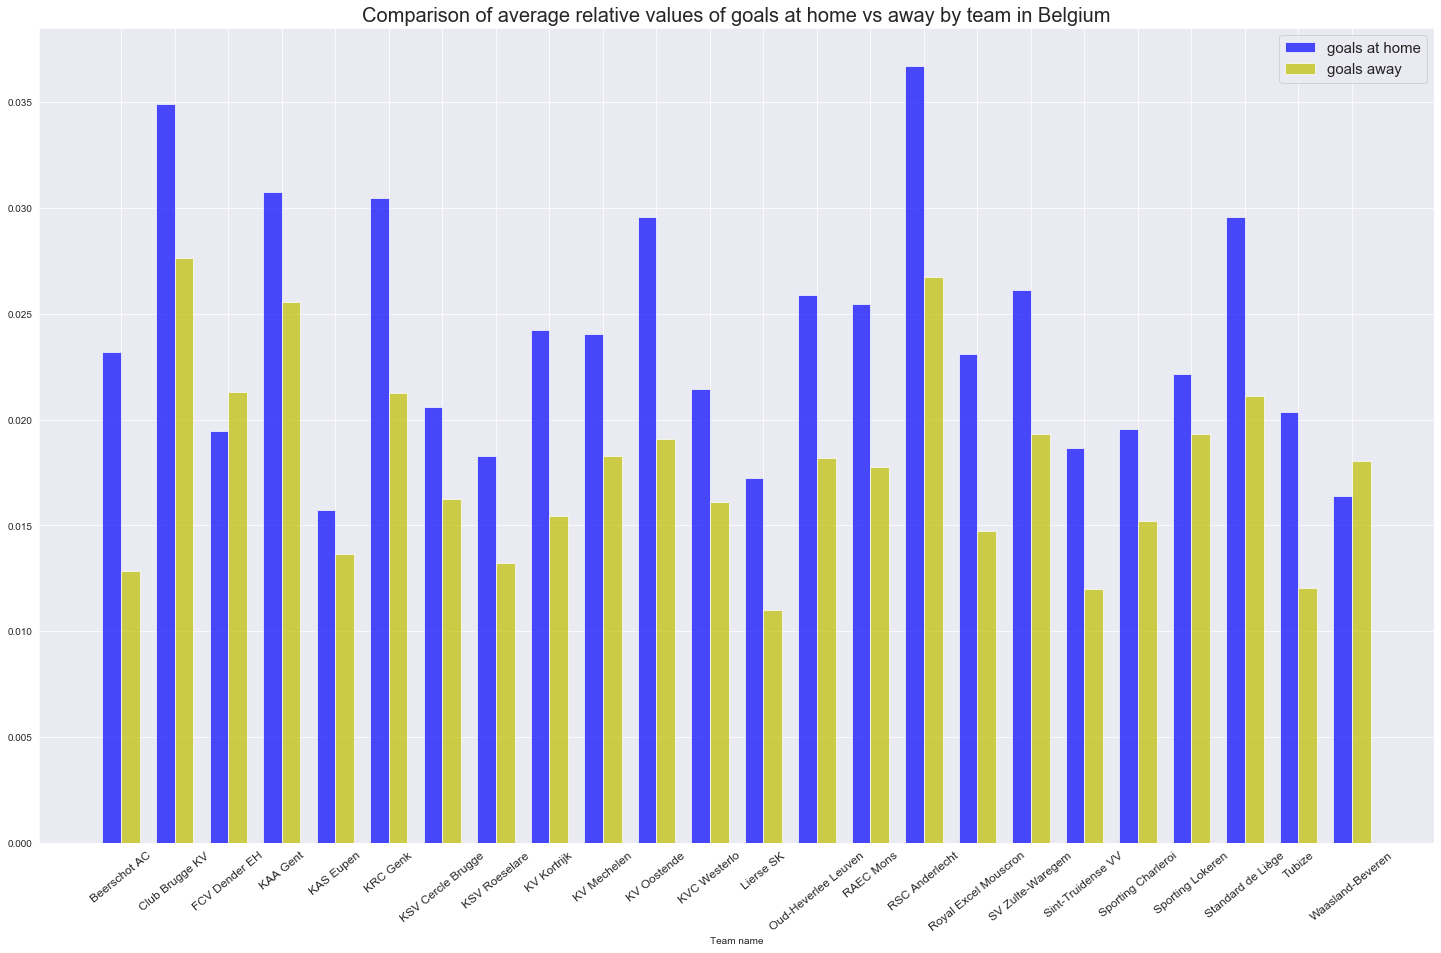

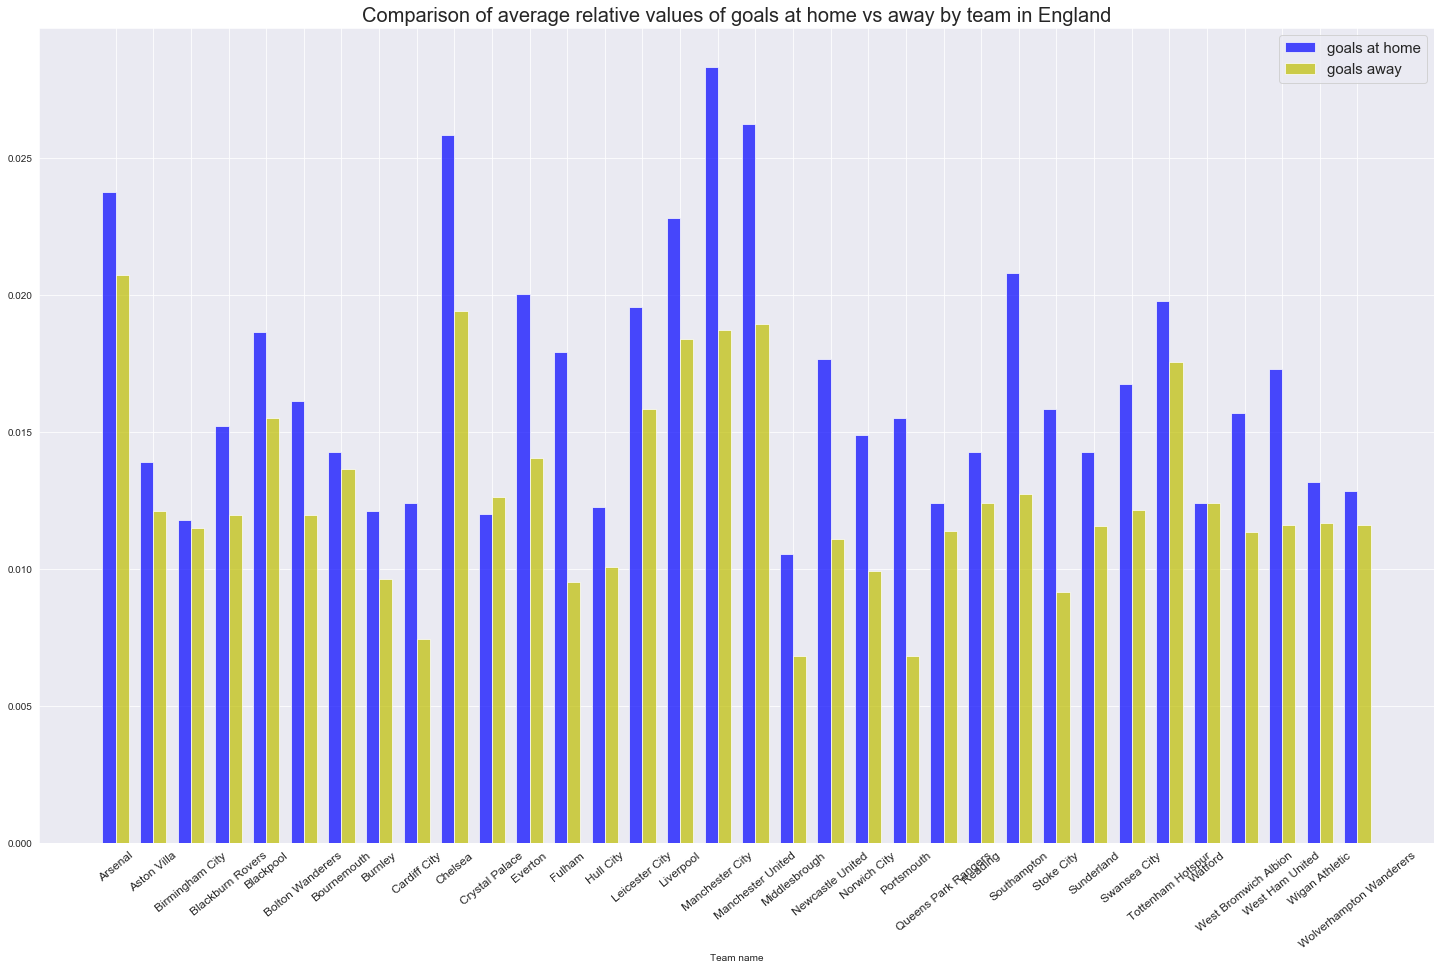

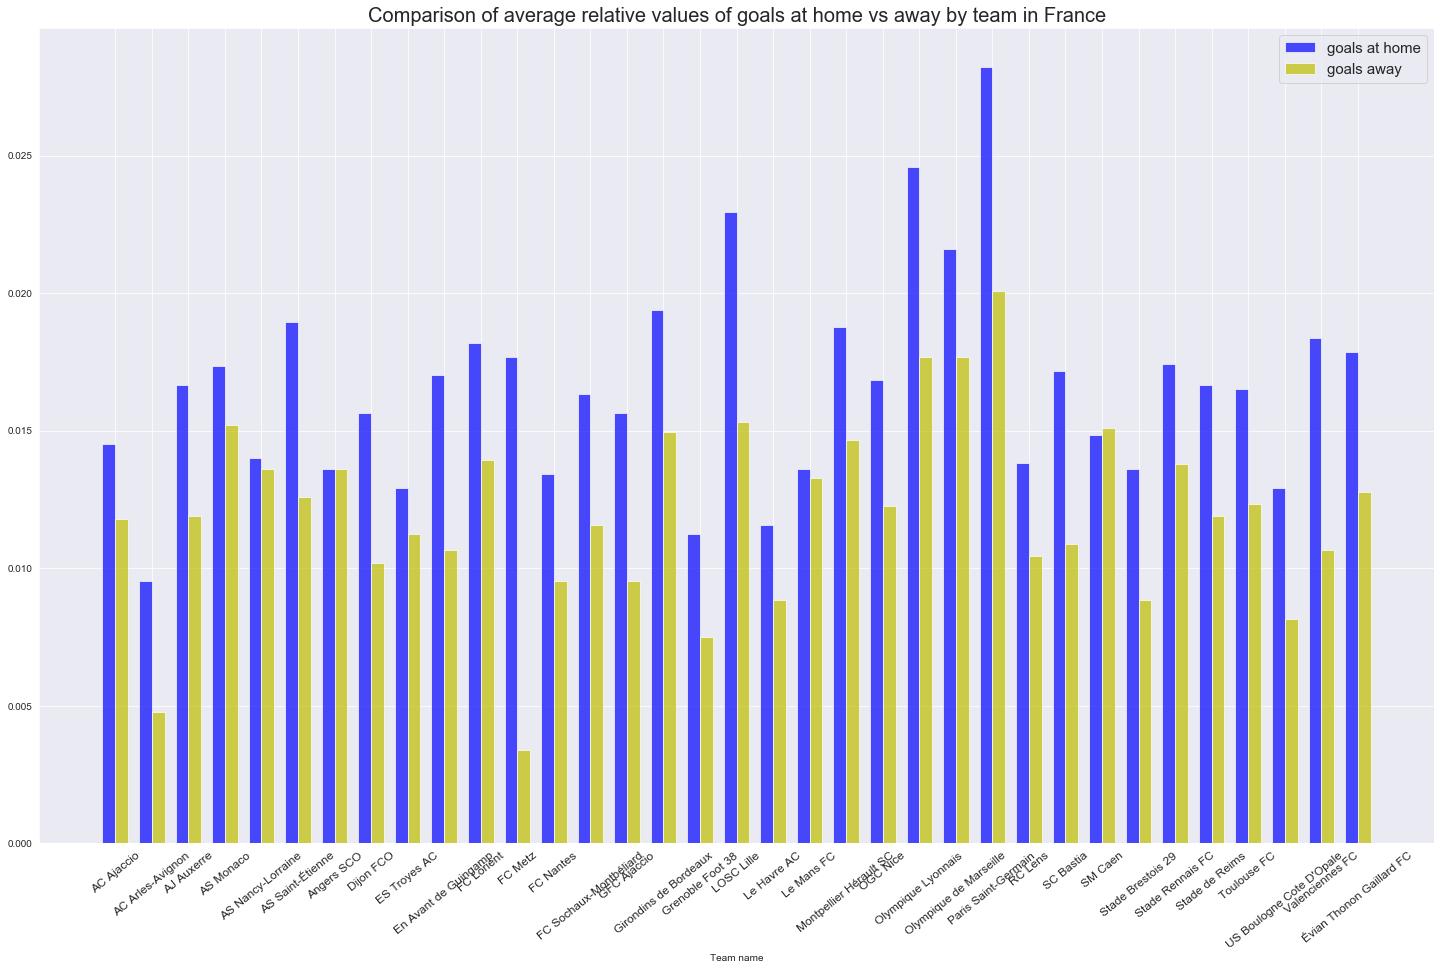

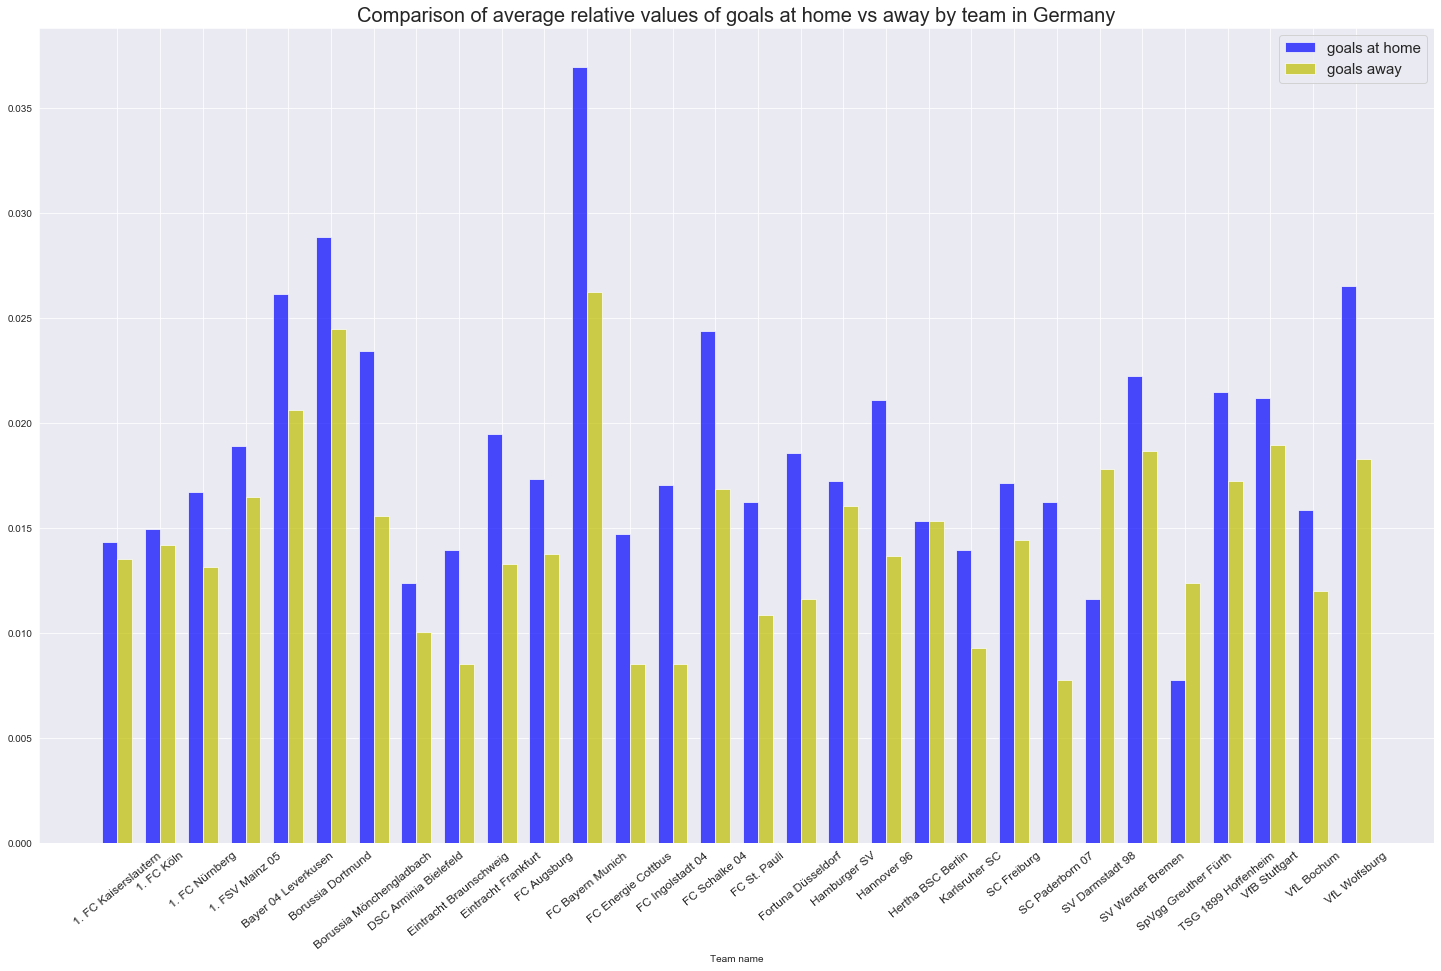

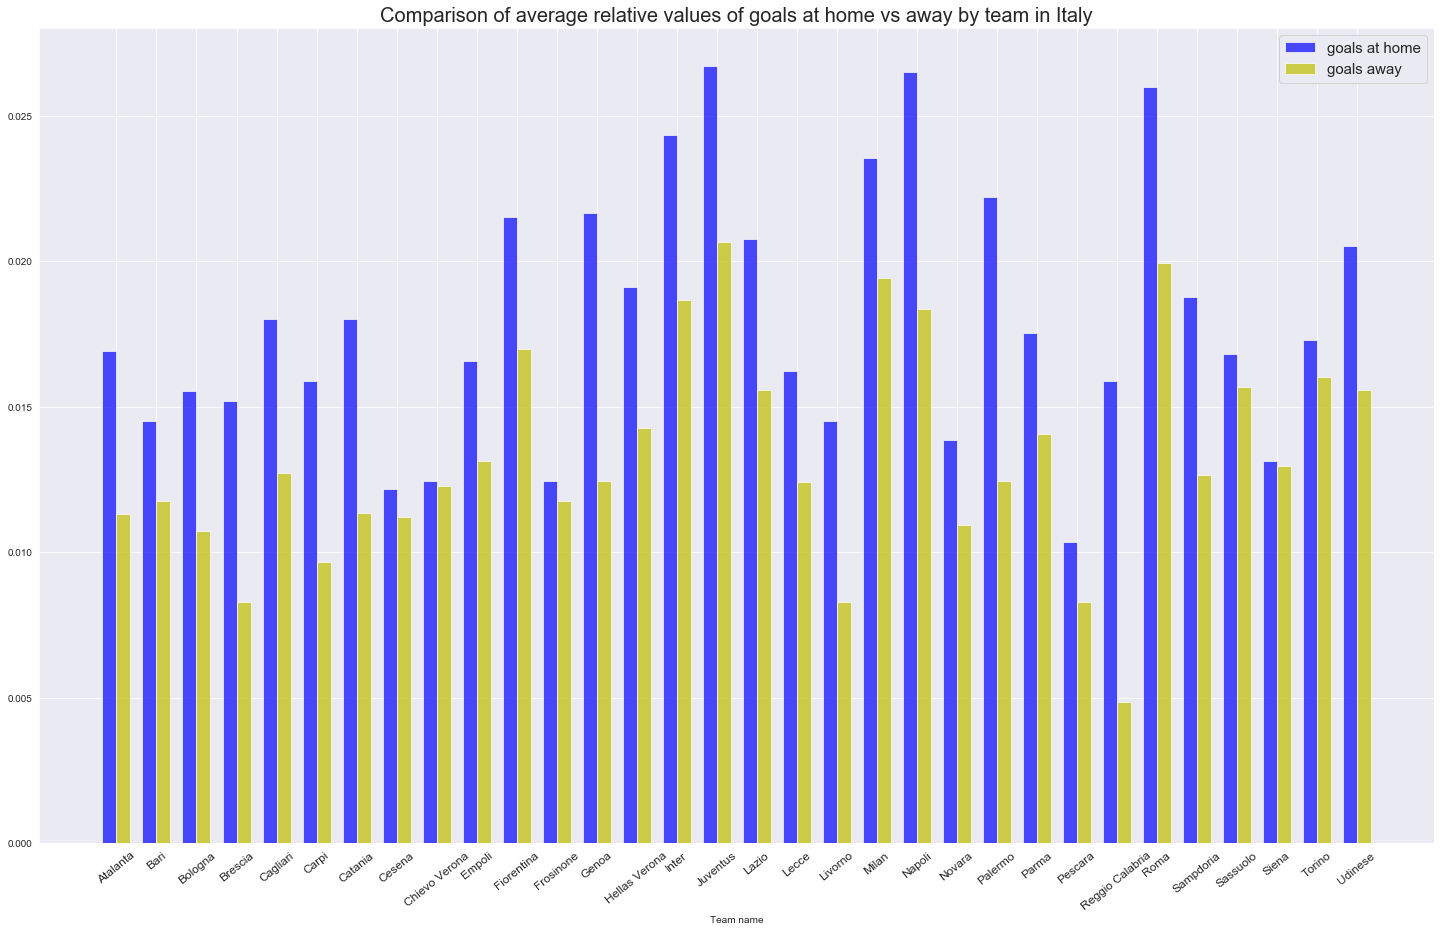

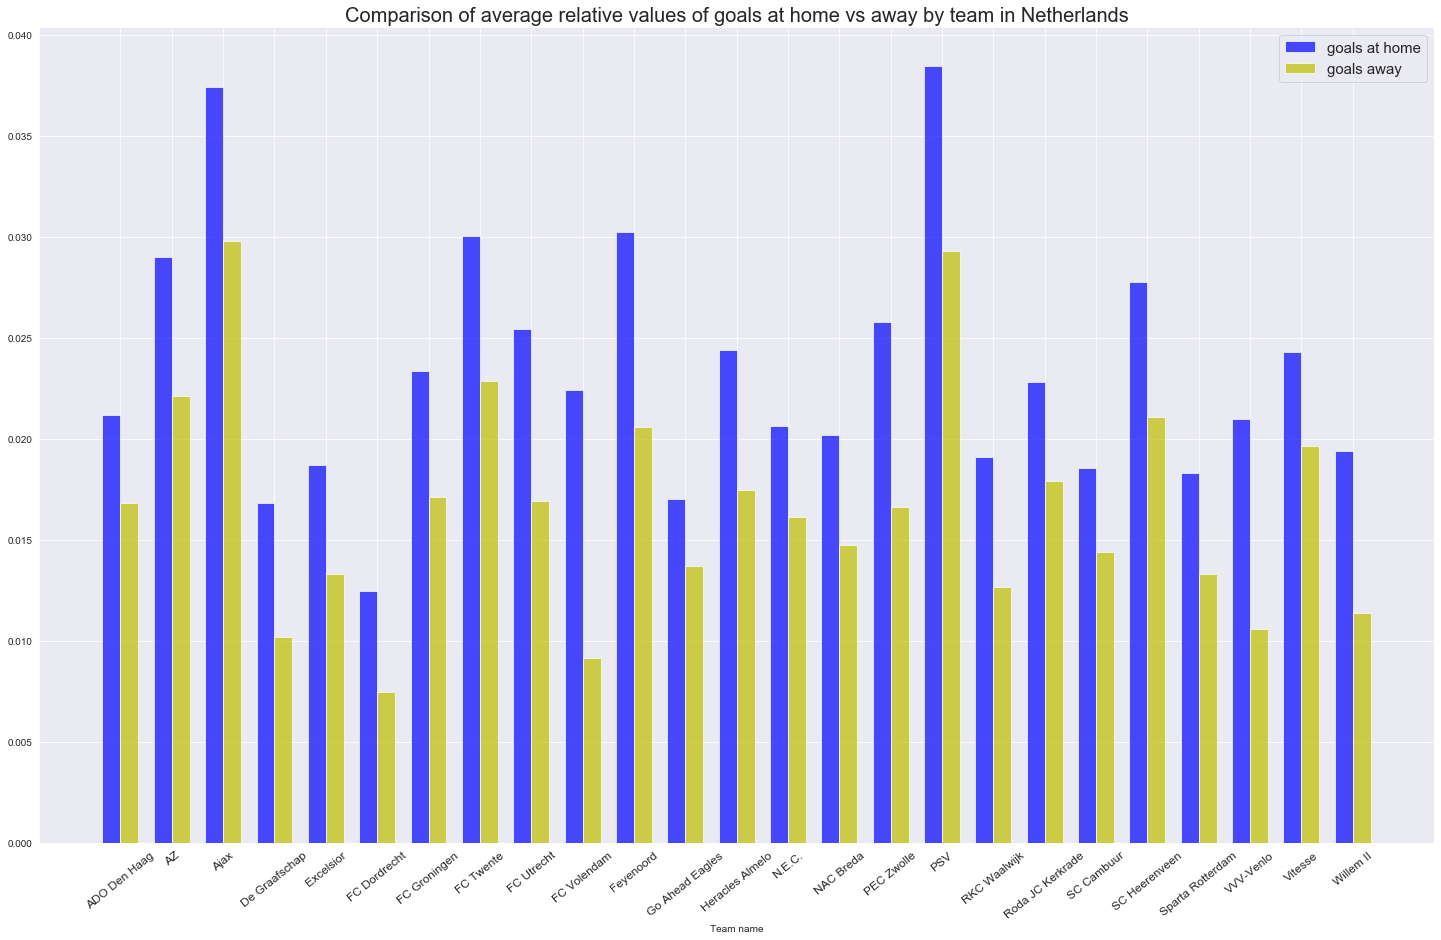

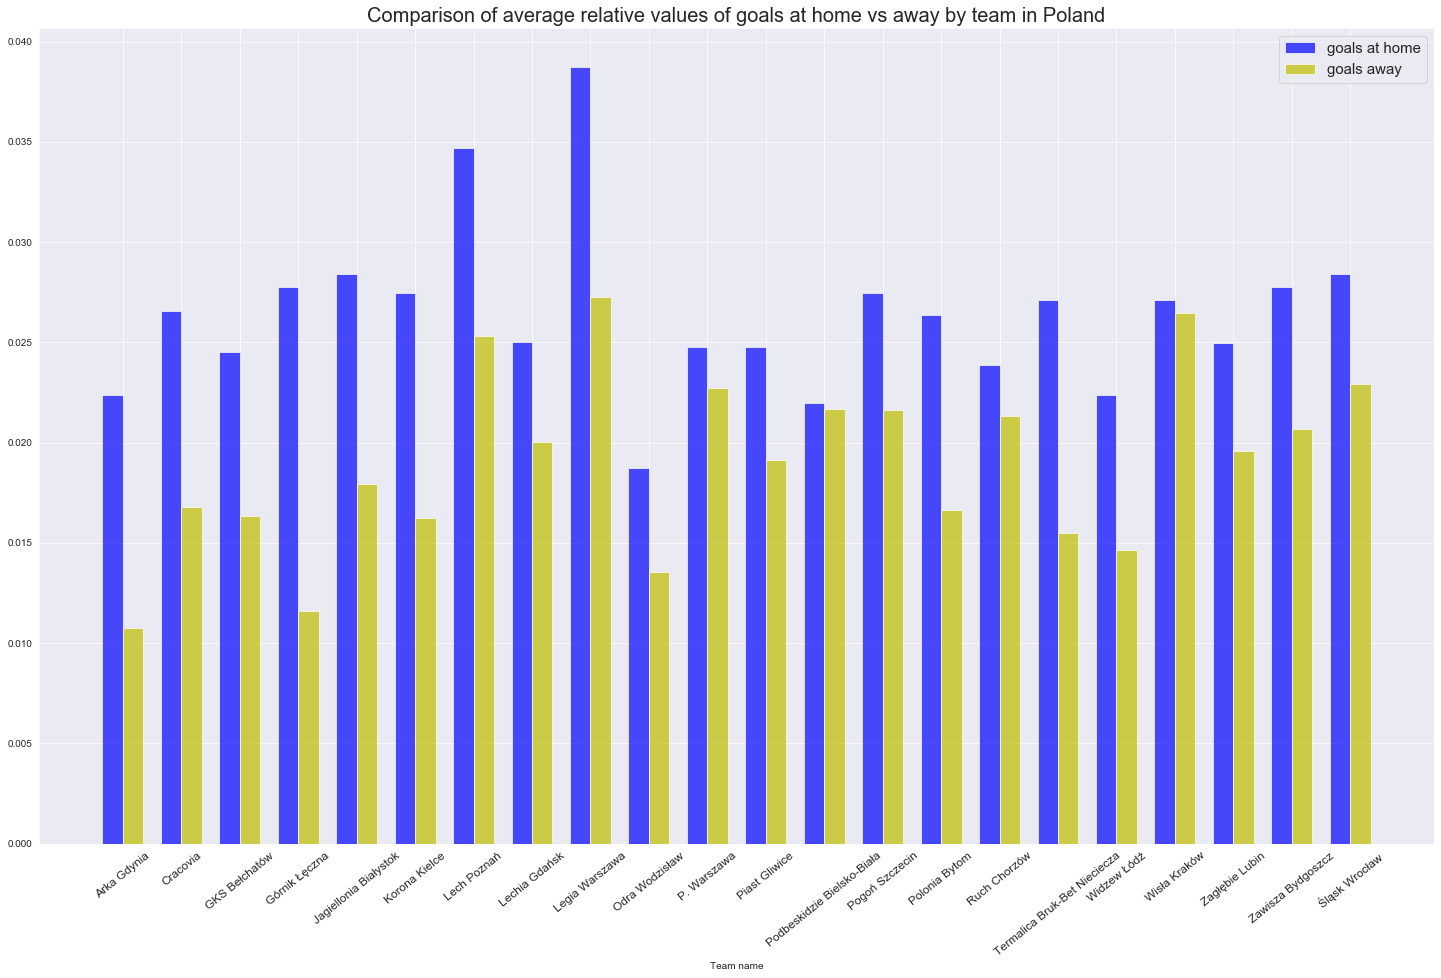

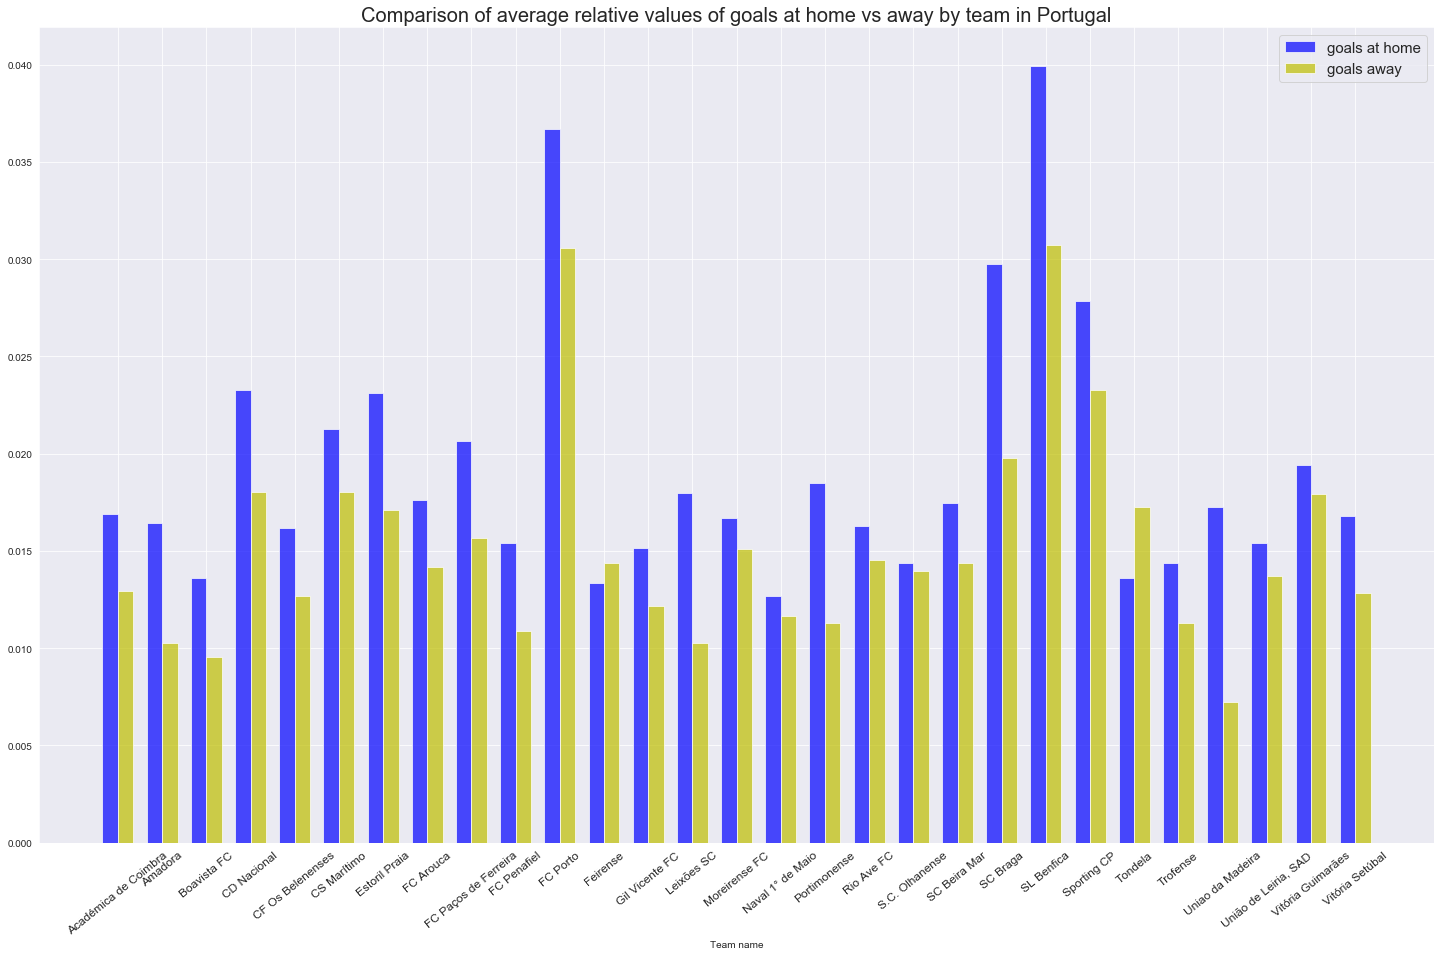

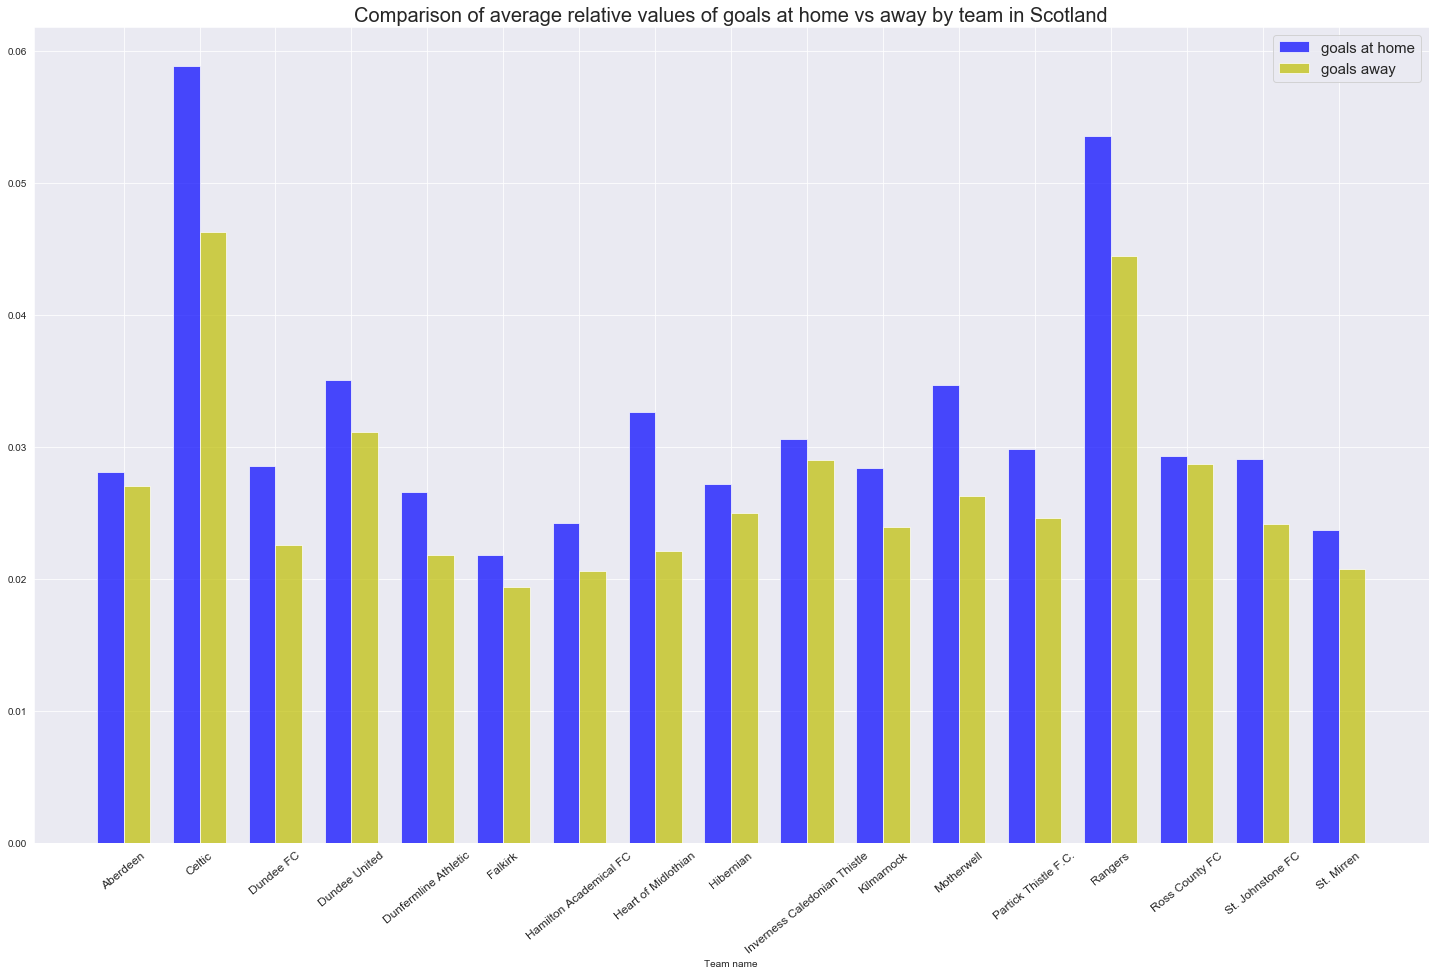

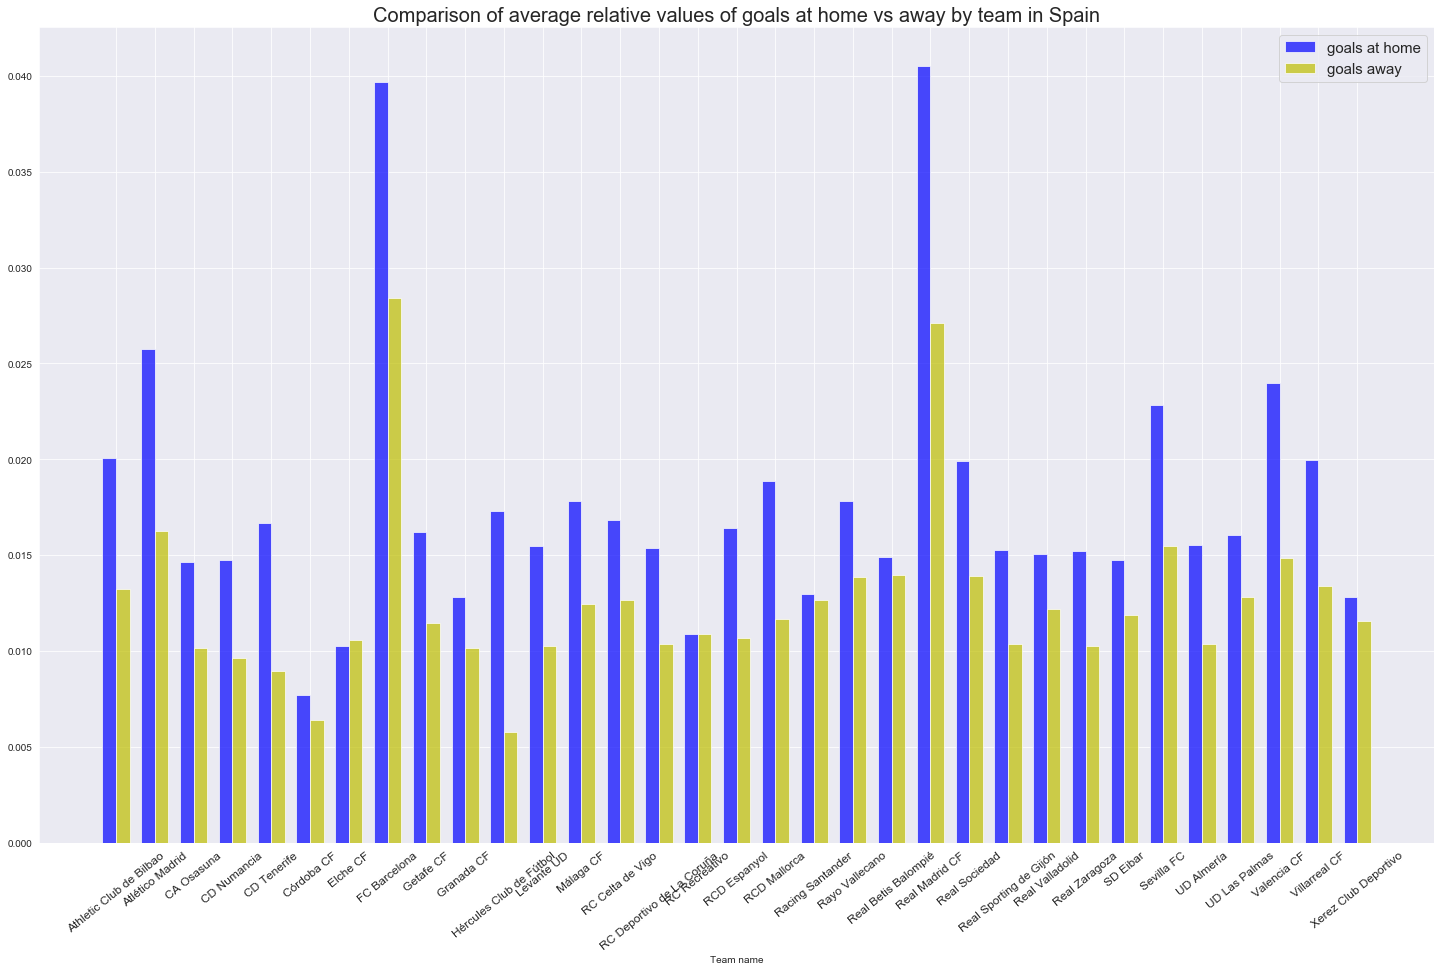

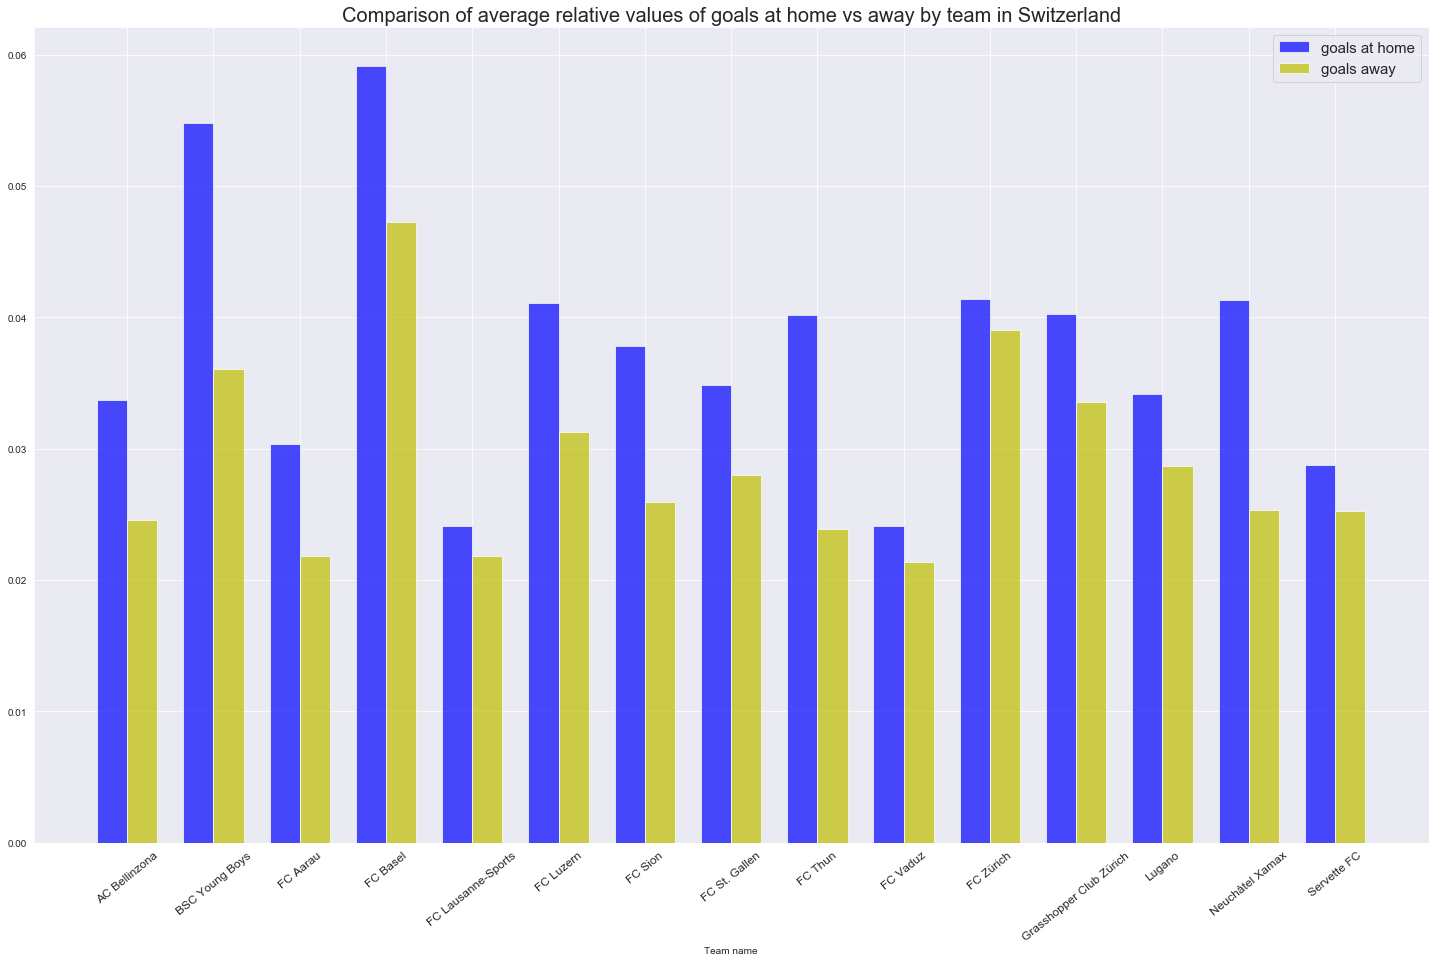

In [19]:
home_team_goal_avg = goals_home_vs_away[['country_name','home_team','home_team_goal']].groupby(['country_name','home_team'], as_index=False)['home_team_goal'].mean()
away_team_goal_avg = goals_home_vs_away[['country_name','away_team','away_team_goal']].groupby(['country_name','away_team'], as_index=False)['away_team_goal'].mean()
goals_home_away_avg = home_team_goal_avg.merge(away_team_goal_avg, left_on='home_team', right_on='away_team', how='inner')
goals_home_away_avg.rename(columns={'country_name_x' : 'country_name', 'home_team' : 'team_name', 'home_team_goal' : 'goals_at_home', 'away_team_goal':'goals_away'}, inplace = True)
goals_home_away_avg.drop(['away_team','country_name_y'], axis = 1, inplace=True)

#avg_goals_country_appended = pd.DataFrame()
path = "./plots/"
i = 0
for country in countries.loc[:,'name']:
    avg_goals_country =  goals_home_away_avg[goals_home_away_avg['country_name'] == country]
    plt.subplots(figsize=(25,15))
    total = avg_goals_country['goals_at_home'].sum() + avg_goals_country['goals_away'].sum()
    avg_goals_country.loc[:,'goals_at_home'] = avg_goals_country.loc[:,'goals_at_home'] / total
    avg_goals_country.loc[:,'goals_away'] = avg_goals_country.loc[:,'goals_away'] / total
    if i == 0:
        avg_goals_country_appended = avg_goals_country
        i += 1
    else:
        avg_goals_country_appended = avg_goals_country_appended.append(avg_goals_country, ignore_index = True)
    ind = np.arange(avg_goals_country.shape[0]) # x location for teams (home and away goals)
    width = 0.35
    home_goals = plt.bar(ind, avg_goals_country['goals_at_home'], width, color = 'b', alpha=0.7, label='goals at home')
    away_goals = plt.bar(ind+width, avg_goals_country['goals_away'], width, color = 'y', alpha=0.7, label='goals away')
    locations = ind + width / 2
    plt.xticks(locations, avg_goals_country['team_name'], rotation=39, fontsize=12)
    plt.title("Comparison of average relative values of goals at home vs away by team in {}".format(country), fontsize=20)
    plt.xlabel('Team name')
    plt.legend(handles=[home_goals, away_goals], fontsize = 15)
plt.show();

The following graphics above show the home and away goal differentials of all European teams. 

As we scroll through the graphs, we can see some interesting takeaways. Such as Liverpool FC in England having such a big advantage in scoring at home as compared to when they aren't at their home stadium called Anfield. The same can be said for the best team in Germany, FC Bayern Munchen. They score more goals on average at home than they do away, although both of their goal scoring averages lead their respective league (Bundesliga). 

We even find a rare occurence of a team scoring more away on average than they do at home. While we do see some clubs having near the same average goals per game at home as compared to away, it's rare to see a side perform better when they aren't playing in their own stadium. But when we look at the chart of all of the teams in Belgium and look at far right, we see it. Waasland-Beveren, a team in the Belgian Pro League, average more goals away than they do at home. This is an interesting case and something which generally conflicts with our usual thinking of teams performing better in front of their home fans. As we can see, this is not the case for this Belgian club. 

Side note: After doing some research about this club, we found that they switched stadiums and merged with another Belgian club. So changing their home stadium and changing their club as a whole (due to the the merger) so this could be a possible reason as to why their away form was better than their home form. It is possible they were just not used to the stadium and were going through executive/hierarchical changes at the club.  

This would be interesting information to use to possibly evaluate the famous "home field advantage" that is of major discussion by all sports fans and could be useful in the world of sports betting as well. It could be an interesting trend which could help us make correct predictions on which teams will win a game or even cover the spread depending on if they are home or away.  

Having the big data frame of goals_home_vs_away that we generated a couple of cells ago also allows us to visualize how much better teams have gotten at scoring in terms of their average goals scored both home and away. It fits in with our background knowledge of that the more goals you score, the better chances you have of winning the game. 

So we want to visualize which five teams have improved the most in terms of their average goals scored (both home and away) from 2008 to 2016. So again we pull the goals scored per club at home and away and then put those two in resulting data frames respectively. We rename the columns of both to...



Then we loop through the five_teams_best, which contains the year by year data of the five teams with the best ratio of goals scored in 2016 as compared to 2008. Using matplotlib, we create a line plot showing just how much these teams have improved in terms of their goal scoring ability both at home and away. We then label the axes and title along with showing a lenged, which tells which team is represented by which line and respective color. 

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


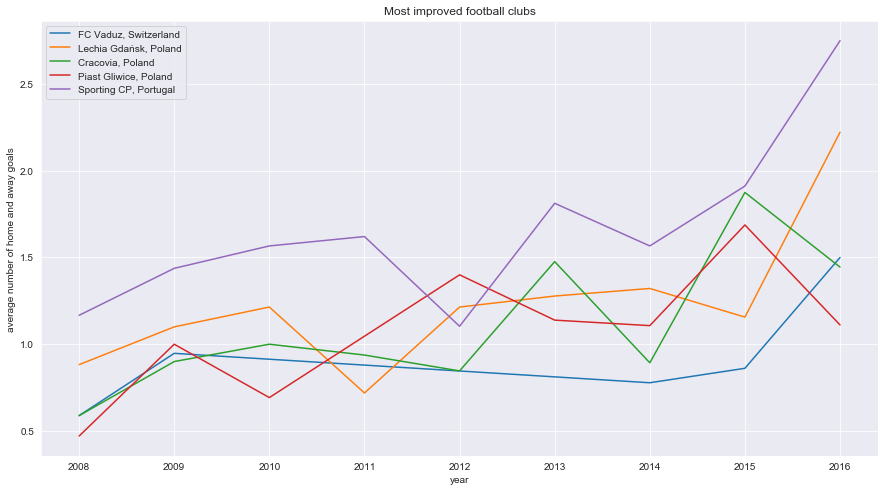

In [20]:
home_goals = goals_home_vs_away[['year', 'country_name','home_team','home_team_goal', 'home_id']]
away_goals = goals_home_vs_away[['year', 'country_name','away_team','away_team_goal', 'away_id']]
home_goals.rename(columns={'home_team' : 'team', 'home_team_goal' : 'total_goals', 'home_id' : 'id'}, inplace = True)
away_goals.rename(columns={'away_team' : 'team', 'away_team_goal' : 'total_goals', 'away_id' : 'id'}, inplace = True)
home_away_goals = home_goals.append(away_goals, ignore_index = True)

home_away_goals_avg = home_away_goals.groupby(['year', 'country_name', 'team'], as_index = False).mean()

#choose 5 teams which have improved the most since 2008 until 2016
goals_ave_2008 = home_away_goals_avg.query('year == "2008"')
goals_ave_2016 = home_away_goals_avg.query('year == "2016"')
goals_ave_2008_1016 = goals_ave_2008.merge(goals_ave_2016, left_on='team', right_on='team', how='inner')
goals_ave_2008_1016.rename(columns={'year_x': 'year', 'country_name_x' : 'country_name', 'total_goals_x' : 'total_goals_2008', 'total_goals_y' : 'total_goals_2016'}, inplace = True)
goals_ave_2008_1016.drop(['year_y', 'country_name'], axis = 1, inplace=True )
goals_ave_2008_1016['ratio'] =  goals_ave_2008_1016['total_goals_2016'] / goals_ave_2008_1016['total_goals_2008']
goals_ave_2008_1016.sort_values(by='ratio', ascending=False, inplace=True)
year = goals_home_vs_away['year'].unique()
five_teams_best = goals_ave_2008_1016.iloc[:5,[1, 5]] #team name and ratio
fig, ax = plt.subplots(figsize=(15,8))
leg = []
for i in range(five_teams_best.shape[0]):
    team = home_away_goals_avg.query('team == "{}"'.format(five_teams_best.iloc[i,0]))
    team.sort_values(by='year')
    ax.plot(team.iloc[:,0].apply(pd.to_numeric), team.iloc[:,3])
    leg.append(team.iloc[0,2]+", " + team.iloc[0, 1])
plt.xlabel('year')
plt.ylabel('average number of home and away goals ')
plt.title('Most improved football clubs')
plt.legend(leg)
plt.show()


As we can see here Sporting CP was the most improved team in the database over time in terms of relative average scoring. In fact, we can see that four of our five most improved teams have come from just two countries in Portugal and Poland. Sporting is followed by Lechia Gdansk as the two most improving teams. It is quite interesting to note that two of the improving clubs suffered down years in terms of average goals scored in a season. Those two clubs are Piast Gliwice and Cracovia from Poland. It is possible that after improving so much over the first couple of seasons, they suffered a down year possibly due to roster overturn, manager change, or even simply not putting away chances in front of goal. 

On the flip side, looking further into how Sporting CP has done so well over the eight years of this dataset would be interesting as well. 

Using our background knowledge, we know that Sporting has produced some world class players in the past years such as Cristiano Ronaldo, Joao Moutinho, Rui Patricio, and Bruno Fernandes and that they are one of the best clubs in the world at making sure these top talents get to the top five leagues in European soccer. It would be interesting to take a deeper dive into just how Sporting CP has gotten better in terms of scoring while coping with losing so much talent over the years in the players that have left for bigger clubs. 
We would want to dive into the individual seasons of Sporting CP to see if they hired a coaches and executives who are great with transfer strategy and/or player development. We would also want to look into individual rosters to see if there are specific years of greatness from certain players who have helped Sporting maintain their impressive improvement in front of goal 

Our final data exploration task will be to look at the attributes of teams and try to see if there are any interesting insights which pop out at us. 

Again we get a pandas dataframe full of team attributes using the read_sql function. We get it from the Team_Attributes table. In our dataframe we have various characteristics about a given team such as their build up play speed, how well they dribble and passing as well as how is their passing, shooting, and crossing when creating a chance to score in front of goal. We also have defensive characteristics about a team such as how aggressive they are, how much pressure they put on the opposing team who has the ball and how wide/spread out is their team when they are on defense. 

We read this into the team_attributes variable and show the info about how non-null values each column has

In [21]:
"""
from DB extract team attributes

"""

team_attributes = pd.read_sql(""" SELECT STRFTIME('%Y', date) AS year,
                                            date AS full_date,
                                            team_api_id AS id,
                                            buildupplayspeed AS speed,
                                            buildupplaydribbling AS dribbling,
                                            buildupplaypassing AS pl_passing,
                                            chancecreationpassing AS cr_passing,
                                            chancecreationcrossing AS crossing,
                                            chancecreationshooting AS shooting,
                                            defencepressure AS pressure,
                                            defenceaggression AS aggression,
                                            defenceteamwidth AS width
                                    FROM Team_Attributes """, db)
#get info about dataset:
team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        1458 non-null   object 
 1   full_date   1458 non-null   object 
 2   id          1458 non-null   int64  
 3   speed       1458 non-null   int64  
 4   dribbling   489 non-null    float64
 5   pl_passing  1458 non-null   int64  
 6   cr_passing  1458 non-null   int64  
 7   crossing    1458 non-null   int64  
 8   shooting    1458 non-null   int64  
 9   pressure    1458 non-null   int64  
 10  aggression  1458 non-null   int64  
 11  width       1458 non-null   int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 136.8+ KB


As you can see from the summary of the team_attributes, the dribbling column (which shows how well a team dribbles when building their attack) has a lot fewer non-null values as compared to the rest. To combat this, we decided to make a decision and drop it from our team_attributes table because of all the null-values it does have. 

So we call the drop() function and include "dribbling" in the columns parameter. We then call .info() again to check that it got dropped.

In [22]:
team_attributes.drop(columns=['dribbling'], inplace = True)
team_attributes.info()
#make sure dribbling is dropped:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        1458 non-null   object
 1   full_date   1458 non-null   object
 2   id          1458 non-null   int64 
 3   speed       1458 non-null   int64 
 4   pl_passing  1458 non-null   int64 
 5   cr_passing  1458 non-null   int64 
 6   crossing    1458 non-null   int64 
 7   shooting    1458 non-null   int64 
 8   pressure    1458 non-null   int64 
 9   aggression  1458 non-null   int64 
 10  width       1458 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 125.4+ KB


Again like with the player attributes, we want to make sure we don't have duplicate rows in our data. But this time we still want the multiple seasons of attribute data per team, which means multiple rows per team, available so we use it in our visualization below. 

So again we call the drop_duplicates function just to be safe we don't have duplicates. 

In [23]:
team_attributes.drop_duplicates(keep='first', inplace = True)

Now that we have our dataset of team attributes, we want to see how all of the attributes of this dataset plot up against each other. We also want to see grab how many goals a team scored that season so we can search and see if any attribute affected goal scoring in the 2015/16 season more than others for all European soccer teams not just one in general. So we merge the team_attributes table with the home_away_goals table we used in our previous data exploration task. We merge on the team id column. So now we have a big dataset filled with how many goals a team scored in each game of a given season/year along with their attributes for that given year. In this dataframe, each row represents a game for a given team. 

We then take the average goals scored per year per team by grouping the table based on team id and then calling the mean on all of the columns. We mainly did this so we can get the average goals scored and given our team attributes are based on per year already, they don't change when we call the mean based on team ID and year. 

We store this output in a dataframe called team_attributes_goals_ave. Then calling the plotting.scatter_matrix() function from pandas, we pass the team_attributes_goal_ave dataframe (while also dropping the ID columnn cause plotting that doesn't tell us anything and wastes space). The result is numerous scatter plot matrices showing how each of the attributes stack up against each other. 

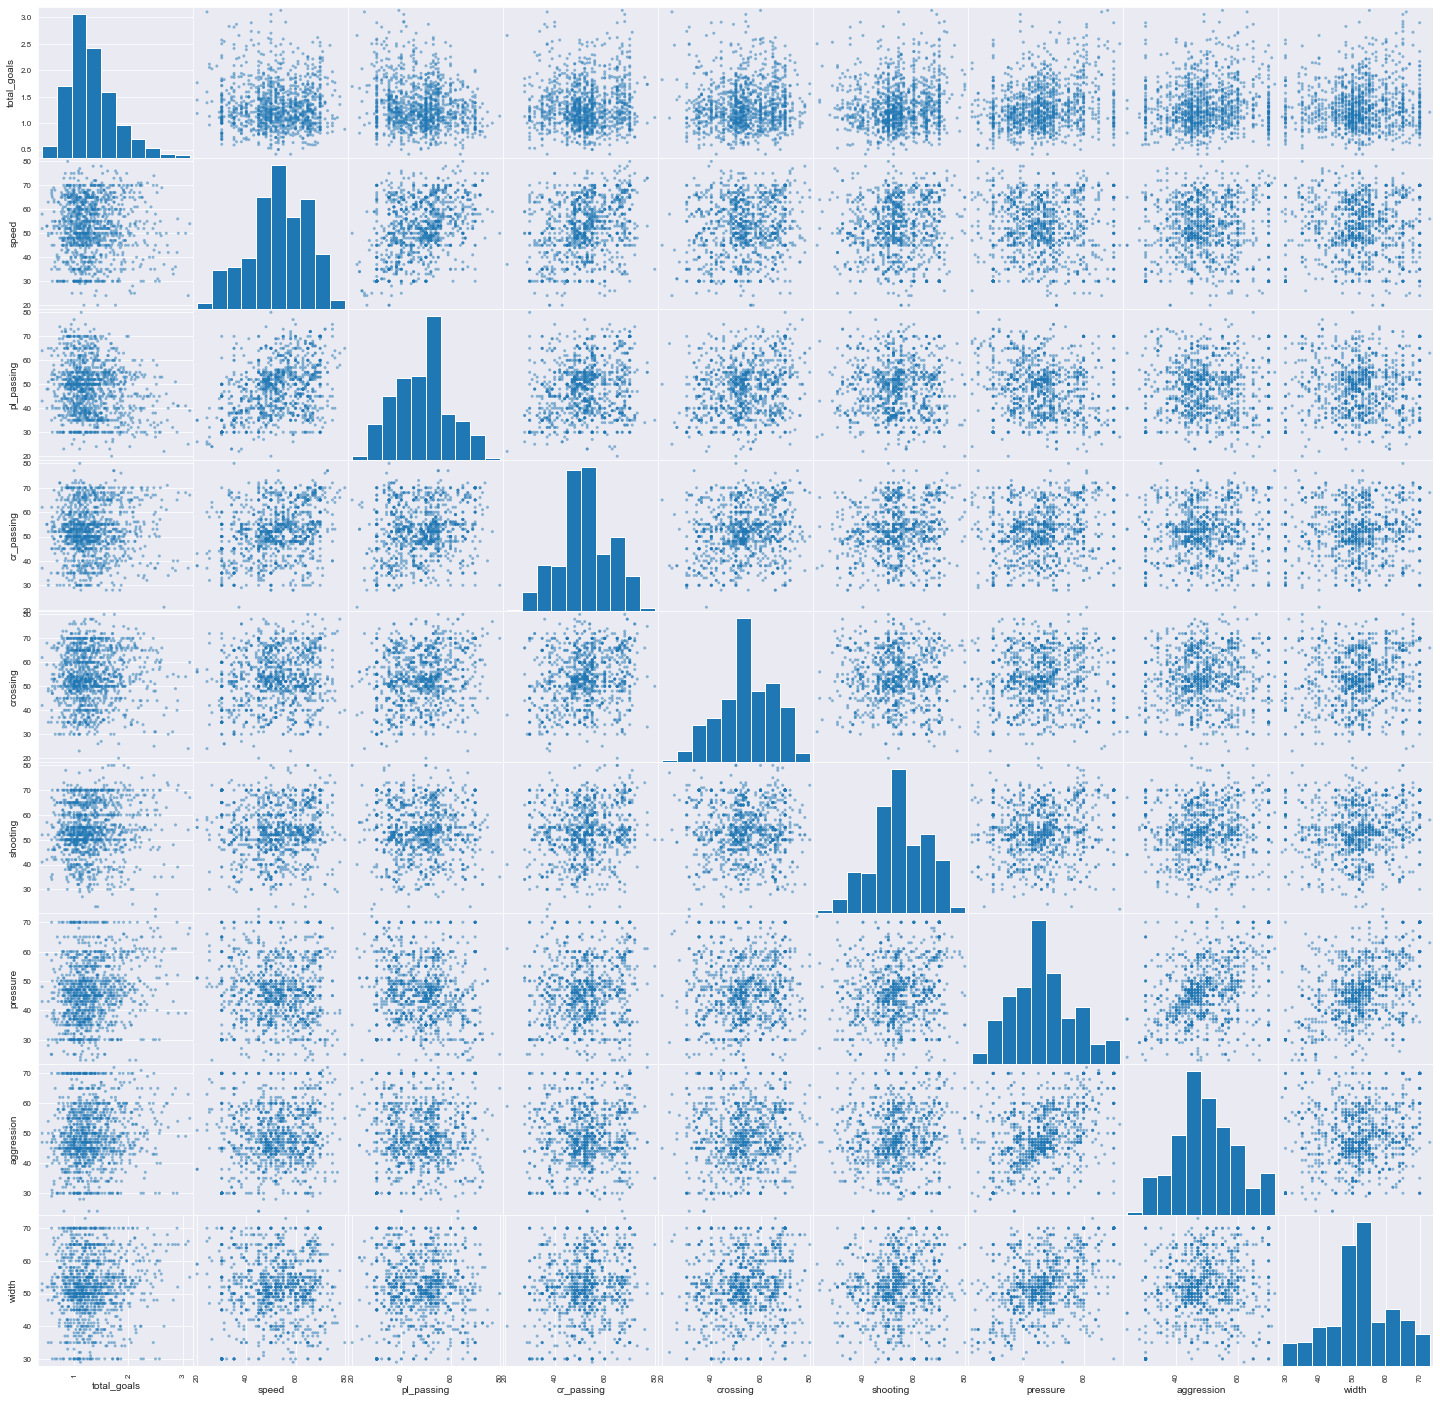

In [24]:
#group by year and id, then find means of team attributes

#merge goals and attributes
team_attributes_goals = home_away_goals.merge(team_attributes, left_on='id', right_on='id', how='inner').query("year_x == year_y")
#Export dataset to Tableau  
team_attributes_goals_ave = team_attributes_goals.groupby(['id', 'year_x' ], as_index=False).mean()

#plot it
pd.plotting.scatter_matrix(team_attributes_goals_ave.drop(columns = 'id'), figsize=(25,25));

Looking at all of the scatter plots above, we can see that: There are potentially significant relationships between player build up passing and total goals, along with the relationship between defensive pressure and number of goals.  So we decided to take a closer look at the scatter plot of the relationships of both of those variables with total goals 

Next we want to take a closer look at the relationship between a teams passing when they are build up their attack and their total number of goals. This will allow us to learn if how much a team passes affects their goal output. 

So we take the 'pl_passing" and 'total_goals' attribute from the team_attributes_goal_ave dataframe and plot them against each other. We also call the numpy function corrcoef() and print out the correlation co-efficient between the two. 

We use matplotlib to make the scatter plot. We call the .scatter() function and pass it the two attributes we want to plot (passing in build up play and total goals). We set the title, axis labels, and then call the show() function so that the plot gets displayed. 

Correlation coef:  -0.17934761375877678


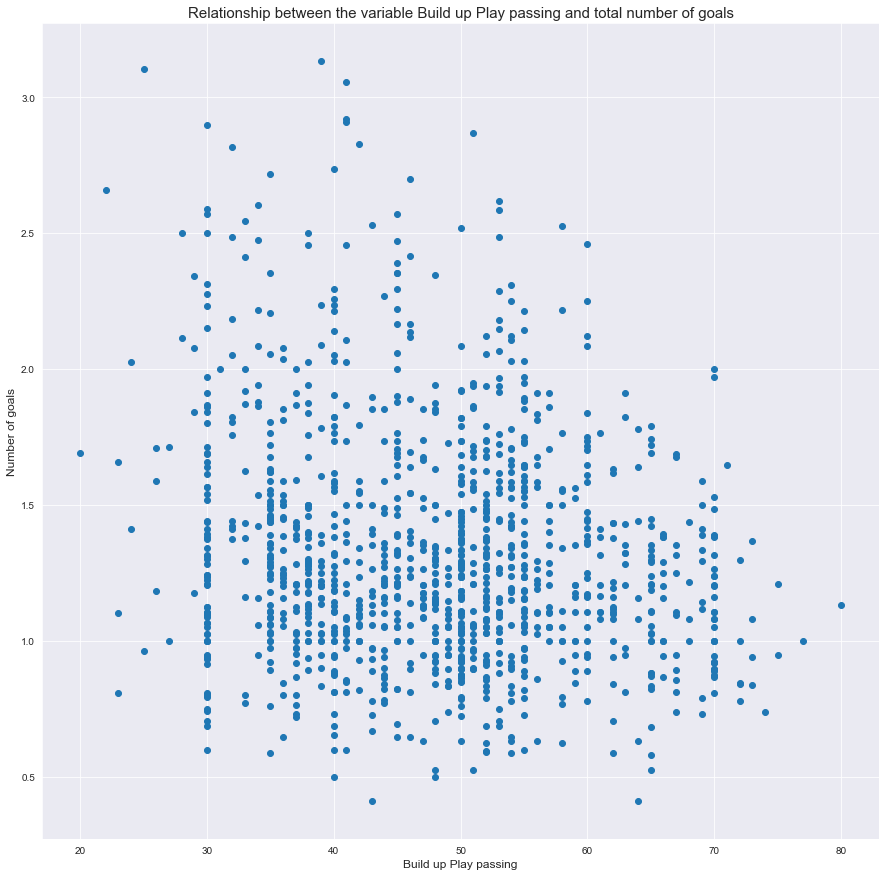

In [25]:
# Using Matplotlib library and numpy's corrcoef() function 
# in order to display correlation co-efficient as well as corresponding grap
plt.subplots(figsize=(15,15))
plt.scatter(team_attributes_goals_ave['pl_passing'], team_attributes_goals_ave['total_goals'])
corr = np.corrcoef(team_attributes_goals_ave['pl_passing'], team_attributes_goals_ave['total_goals'])
print("Correlation coef: ", corr[0,1])
plt.title('Relationship between the variable Build up Play passing and total number of goals', fontsize=15)
plt.xlabel('Build up Play passing', fontsize=12)
plt.ylabel('Number of goals', fontsize=12)
plt.show()

Above we can see that we get a correlation co-efficient of about -0.17, which shows a negative correlation between passing in build up play and total goals scored but it's very weak.  

The graph shows a weak negative correlation as well. We can see slightly that as a team's build-up play passing rating improves, the average amount of goals per game doesn't necessarily increase. In fact, we can see that as a team's passing rating gets to 70 and above, there are only two teams who have averaged 2 or more goals. In fact, we can see that after it gets past around 71-72 on the x-axis, no team averaged more than 1.5 goals per game. We see that the only team with an 80+ or more rating averages between 1 to 1 and a half goals per game. In contrast, we can see that some teams with low build-up play passing have averaged more than 2.5 goals per game. There even is one on the top left that averages more than 3 goals per game. We also see a bunch of teams averaging around 2.5 or more with in the middle build-up passing play as shown in the center of the plot. 

So in all we can't necessarily say there is a strong negative correlation between the average goals a team scores and how well their passing is but there are signs that being good at passing the ball doesn't exactly mean you are a team that scores a lot. Having a lot of possession in a game is good for any team as they can control the tempo of the game and wear out their opponents. But it doesn't mean anything if you can score goals and win the game. As we can see by the graph, there is some negative correlation between being an elite passing team and scoring goals. We can generate a takeaway that while teams should try to be better than passing, they should try to pass too much when creating their attack towards goal. Maybe taking more riskier passes (which may result in a lower build-up play rating) can lead to better shots on target, which in turn leads to more goals. Again, just having possession and passing well doesn't matter a whole lot if can't score. 

We create one final scatter plot to see if the amount of defensive pressure a team puts on their opponent affects their goal scoring output on the other end. We did this because of our background knowledge of soccer. If a team is aggressive on defense, they will win the ball back more and force turnovers/sloppy passes from their opponents. This will lead to counter-attacking opportunities as these teams will catch their opponents off guard and with too many players up the pitch and they can't come back quickly enough to defend. 

However, being aggressive does have it's downsides. By taking more risks, you give up more fouls which in turn give your opponents more chances to score from set pieces. Also being more aggressive means your players make take more risks to steal the ball, leaving gaps in your own defense which may lead to giving up more goals. We wanted to test and see if being more aggressive on defense is actually worth it. By plotting this, we will see if there is a correlation between aggressiveness on defense and how many goals you generate for yourself. 

Again we use matplotlib in order to plot out scatter plot. We call the scatterplot function, passing the two attribues we want. Then like last time we also plot the correlation co-efficient between the two attributes to see there is a positive and negative correlation and how big of a correlation it is. 

We call corrcoef from numpy and pass it the same parameters we did for the pl.scatter() functionc all in the line above. 

Then we label the title and axes of the graph then call show() to display the plot.  

Correlation coef:  0.20351392319845193


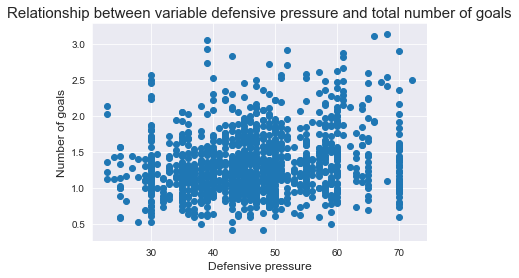

In [26]:
plt.scatter(team_attributes_goals_ave['pressure'], team_attributes_goals_ave['total_goals'])
corr = np.corrcoef(team_attributes_goals_ave['pressure'], team_attributes_goals_ave['total_goals'])
print("Correlation coef: ", corr[0,1])
plt.title('Relationship between variable defensive pressure and total number of goals', fontsize=15)
plt.xlabel('Defensive pressure', fontsize=12)
plt.ylabel('Number of goals', fontsize=12)
plt.show();

As we can see by the correlation co-efficient, there is a small positive correlation between the defensive pressure a team generates and the average amount of goals they score on the other end of the pitch. We see that some teams that have a defensive pressure of around 70 sometimes can average up to 3.0 goals per game. 

However we also notice that teams in the same defensive pressure range of 70 can average anywhere from less than a goal per game to somewhere around two goals per game. So there isn't a lot to suggest that ramping up the defensive pressure on your opponent leads to a better offense. 

But on the bottom left of the graph, we do notice something interesting about teams that don't apply a lot of defensive pressure. We see that teams that have a defensive pressure lower than 30 don't average more than 2.5 goals per game. In fact only two teams have lower than a defensive rating of 30 average 2 or more goals per game. Using our background knowledge, we can see why this would be true. If a tem doesn't apply any defensive pressure at all, they are essentially showing that they are fine with not having a lot of the ball or possession. Teams such as this may be smaller or less talented teams in top European leagues whose only goal is to stay in that given league and not be relegated. So they take more of a conservative approach: stay back defensively and absorb all of the offensive pressure that their opponent is throwing at them. Then take your chances to score a goal off a set piece or a counter, which may not happen a lot in the game given how much possession you are conceeding in the game. Since these teams only get rare chances to score goals, their goal average may not be as high. They would be perfectly fine with a 1-0 win or a 1-1 draw. Getting into a high scoring game may not be what they want as they are facing more talented teams that could beat pretty easily if the game gets more wide open or offensive minded.

So we can see that there isn't a huge positive correlation between defensive pressure and average goals scored. But there is some evidence to suggest that ramping up the pressure does lead to more scoring. 

This information could be useful to soccer managers and executives who are coming into a new club and wanting to change the style of play. For example they could be coming into a club that is usually more defensive minded and they want to shake things up and make the games more exciting to watch. They can argue to the coaching staff and players that ramping up defensive pressure by a bit could lead to some more goals being scored on the offensive end. 

Exploratory analysis was done on the goals scored by the largets countries in Europe, along with their performance in goals scored on average over time.  Which leads to questions regarding to how much in the change in goals over time per country related to the change in talent differential in the countries.  Meaning these other countries' leagues are developing or paying better players to play in their leagues.

Next a home and away goal scoring average was calculated for every team in the database.  This could be useful for anyone in the sports wagering world as this information could potentially be used to attempt to generate a "home field advantage" metric or to create a scoring differential metric.  The next step was determining the 5 teams who improved the most over time with respect to this metric with the most improved team being 'Sporting CP Portugal' improving by almost 1.5 goals a game in this time frame!

Finally we were able to explore the correlation between team based stats and the goals scored.  Which really did not give us much in terms of information regarding a significant correlation but it did give us the opportunity to explore relationships between other variables such build up play passing and defensive pressure.

## DM TASK 1: Linear Regression model on predicting player overall based on individual attributes

Our first true data mining task was to build a linear regression model. The purpose of this task was to create a model that can predict a players overall rating based on their individual attributes. We are also looking to see which individual attributes affect a players rating the most either positively or negatively. We will use packages from sckit-learn and the math python package to help us build the model itself. The documentation for these packages are in the appendix. 

So to start of we import off all scikit learn packages needed to properly run a regression model. We also import the sqrt function from the moath module as well. 

In [27]:
# Import statements for various packages we will be using for building the linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

Next we want to create a dataframe of player attributes since the goal for our model is to predict a players rating. So it would make sense to have the predictors/independent variables of this model be the player attributes and skill ratings. Luckily thanks to our pre-processing, we know that all of the player attributes are in one table called Player_attributes. We use the read_sql_query() function and pass it an SQL command to take all of the attributes from the Player_Attributes table that is in our database object. 

We store this into a dataframe called PlayerDf and call shape() on this to see how many attributes and rows we have in this dataframe. 

In [28]:
PlayerDf = pd.read_sql_query("SELECT * FROM Player_Attributes", db)

PlayerDf.shape

(183978, 42)

As we can see from the shape() function call, we have over 18,000 rows and 42 columns in our dataframe. This makes it a big data frame and putting all of these predictors into our model wouldn't be the best idea. As a group we felt that a way more sparse and smaller set of features/predictors would be the best. Having a smaller set of features in our linear regression model would make it easier to explain in terms of which predictors affect overall rating the most. Also in terms of real-life practical use, having a model with numerous predictors (as in 40+) would be pretty expensive and not something we would possibly do in a real life job. 

Here we can see all of the features/columns that are in our dataset for a given player. We notice that we really don't need some of these attributes such as date, and the three ID columns we have. These aren't player attributes and will likely have no bearing on impact on predicting a players overall rating. So we made a design descision to remove those four predictors

In [29]:
PlayerDf.iloc[149591]

id                                  149592
player_fifa_api_id                   13879
player_api_id                        39225
date                   2016-03-10 00:00:00
overall_rating                          75
potential                               75
preferred_foot                       right
attacking_work_rate                   high
defensive_work_rate                 medium
crossing                                67
finishing                               81
heading_accuracy                        84
short_passing                           66
volleys                                 72
dribbling                               65
curve                                   77
free_kick_accuracy                      84
long_passing                            72
ball_control                            75
acceleration                            48
sprint_speed                            46
agility                                 57
reactions                               76
balance    

As you can see below, we create a list of features called features that we will use in our regression model. While there are still 30+ predictors in our model, we as a group felt that all of these attributes were important to helping predict a given players. Each of these attributes represent an important skill that a given soccer player needs to play on the pitch. We have features such as their passing, balance, stamina, jumping skill, interceptions, positioning, and vision. 

As another design choice, we decided to keep in goal keeping statistics as some of the players in our dataset are goalkeepers and aren't guys who play any other position. We thought of only including non-GK players but we felt that it would benefit our model if we can try and predict the overall rating of all of the different type of soccer players. Also it's worth noting that given our background knowledge of soccer that there are times where non-goalie players are forced to play that position (ex: if the backup goalie is already in and gets a red card). So some of these non goal keeper players may have higher GK attributes than we expect and that could also play a hand in raising their overall rating. So our group decided that this would be interesting to see how goal keeping stats affect non-goalkeeper players and on the flip side, how non goalkeeping attributes affect a goalkeepers rating. 

Below is our list of features: 

In [30]:
features = [
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']


Since we want to predict overall rating, so we take the overall_rating column and put it into an variable called target. This will denote our target or dependent variable in our linear regression model. 

In [31]:
target = ['overall_rating']

We do some further pre-processing in our predictors data frame by calling dropna() so we can drop all of the rows that have an NA in it. This will help our model and not give us false results

In [32]:
PlayerDf = PlayerDf.dropna()

Next we subset our PlayerDf dataframe into two seperate datasets. First subset contains a dataframe only consisting of rows that were listed as our feature variables. We pass the features list to PlayerDf and store it in a variabe called X. 

Subsequently we subset the target column (overall_rating) from PlayerDf and store it into a variable called y. 

We then call .iloc on X to show that we did indeed subset correclty. As shown by the oupt of .iloc(), we can see that we have all of the features that we need to predict overall_rating, which is a players overall rating according to the video game series, FIFA. 

In [33]:
X = PlayerDf[features]
y = PlayerDf[target]
X.iloc[1]

potential             71.0
crossing              49.0
finishing             44.0
heading_accuracy      71.0
short_passing         61.0
volleys               44.0
dribbling             51.0
curve                 45.0
free_kick_accuracy    39.0
long_passing          64.0
ball_control          49.0
acceleration          60.0
sprint_speed          64.0
agility               59.0
reactions             47.0
balance               65.0
shot_power            55.0
jumping               58.0
stamina               54.0
strength              76.0
long_shots            35.0
aggression            71.0
interceptions         70.0
positioning           45.0
vision                54.0
penalties             48.0
marking               65.0
standing_tackle       69.0
sliding_tackle        69.0
gk_diving              6.0
gk_handling           11.0
gk_kicking            10.0
gk_positioning         8.0
gk_reflexes            8.0
Name: 1, dtype: float64

We also display Y below show that the variable is a dataframe that only has the overall_ratings of every player in our original player_attributes table that didn't have NA values in it's given row.  

In [34]:
y

,overall_rating
0,67.0
1,67.0
2,62.0
3,61.0
4,61.0
...,...
183973,83.0
183974,78.0
183975,77.0
183976,78.0


Next we want to actually start building the regression model. But first we have to split up our dataframe into training and testing sets respectively. So we call the train_test_split() function to generate an 80-20 split into the training and testing data. We pass X (predictors dataframe) and Y (target dataframe) into the function along with specifying the test_size parameter to be 0.2, to indicate an 80 percent to 20 percent split. We set the random_state to a non-zero number to indicate that we want this to be a random split. As in random rows into the training and testing sets respectively. 

This function generates four datasets. Two training and two testing with two for the features/predictors and two for the target attribute. 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

Next we create our Linear Regression object by calling LinearRegression() from the sckit_learn.linear_model module. We call this object LinReg. We then fit the linear regression model to the features training data set and the target training data set called X_train and y_train. Below we can see that we were able to fit the data according to the model 

In [36]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now that we trained and fitted the model according to the training data sets, we need to make predictions to see if our model is producing accurate results. So we call the predict() function on our Linear Regression object and pass it one parameter, which is our testing set of player_attributes. This is a dataset that the linear regression model has not seen. We store this set of predictions into a varible called y_prediction. We then display it to show that it did in fact create predictions

In [37]:
y_prediction = LinReg.predict(X_test)
y_prediction

array([[69.43244514],
       [71.19195016],
       [62.92504911],
       ...,
       [63.22256883],
       [74.31389393],
       [71.23038374]])

We want to compare our predictions to the target test set, which is called y_test. To take a first look at y_test, we call the describe function to see some basic statistics about the test data. We can see that it has a mean rating of 68 with a minmum rating of 35 while a maximum player rating of 94. So we can see that we have a really wide range of overall player ratings in our test data set. 

In [38]:
y_test.describe()

,overall_rating
count,36071.000000
mean,68.667572
std,7.010185
min,35.000000
25%,64.000000
50%,69.000000
75%,73.000000
max,94.000000


### Generating Root Mean Squared Error (RMSE), Coefficient (R^2), Intercept, and the variable coefficients

Now that we fitted our model to the training set and made predictions based off the test set, we want to see how well our linear regression model is at making predictions and how much predictive power it has. This means finding out the root mean squared error of the model as well as finding the R-Squared co-efficient. We also want to find out other aspects of the model such as the variable co-efficients of each of the predictors. These co-efficients could give us some insight into which attributes affect a players overall rating the most either positively or negatively. 

We generate the root mean square error of our model. We do this by calling the mean_squared_error function and passing it two parameters. The first one is the actual values of our target variable from the testing set (y_test) and the second is the predictions we just generated called y_prediction. By calling the mean_squared_error function on these two, we can figure out just how far off our predictions, which were based on the attribute test set, were from the actual overall rating values of the test set. 

We then call square root on this function in order to get the root mean squared error. We store this value in a variable called RMSE. To show the root mean squared error of our model, we print the RMSE variable but use the round function to round it two only 2 decimal places

In [39]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(round(RMSE,2))

2.78


Above we have a root mean square error value of 2.78. This is a decent error value to get for our model as it shows that we are doing ok at making accuracte and close predictions of a players overall rating when compared to the actual rating values in the test set. When it comes to root mean square error, the lower the better. Although a too low of a value would give us concern of overfitting. Obviously we want to improve on this root mean square error and possibly get it closer to 1

Next we generated our R-squared co-efficient to show the predictive power of our model. We call the score function and pass it the test samples (which is the attributes testing set) and the actual values of the test set (target variable). So we pass both parts of the test set to the score function and store its output in a variable called r_sqr. 

We then again round r_sqr to 2 decimal points and print it out to display our R^2 for our multiple linear regression model. 

We also want to find out the intercept of the model as well as the co-efficient values for each of our predictors. Luckily for us our Linear regression object has attributes that can tell us this. We can get the intercept by calling the .intercept_ attribute. 

Then we get grab the co-efficients by printing out and calling the .coef_ attribute of the LinReg object. 

We print both of them in the cell below to show our results

In [40]:
r_sqr = LinReg.score(X_test, y_test)
print('coefficient of determination (R^2):', round(r_sqr,2))

coefficient of determination (R^2): 0.84


In [41]:
print('intercept:', LinReg.intercept_)
print('slope:', LinReg.coef_)

intercept: [-3.63773321]
slope: [[ 0.37752871  0.02248772  0.01130971  0.06982385  0.04959063  0.00450865
  -0.01303863  0.01158298  0.01235213  0.00804805  0.13676963  0.00678281
   0.00861042 -0.00962     0.20946919  0.00916688  0.01687013  0.01541496
  -0.00522137  0.06140542 -0.013629    0.02035818  0.01282395 -0.01013807
  -0.00280779  0.01456482  0.03259262  0.00305752 -0.02885327  0.16380633
   0.03271557 -0.03423656  0.05688557  0.02481859]]


As you can see from the modeling we have an R^2 of 0.84 indicating a strong predictive ability of the model.  A 0.84 score is satisfactory as it indicates a strong correlation and predictive ability without being high enough of a R^2 to where we would really have to consider overfitting being an issue.  Wtih variables 1, 15, and 31 carrying the coefficients with the most weight.  Those variables happen to be: Potential, Reactions, and Goal Keeper Handling.   If one was going to run a lasso regression based model you could interpert from this data that those are 3 of the key features that would be selected in a lasso regression.  We want our RMSE as close to 0 as possible, a RMSE of 2.78 which we will definitely take as we worked with variables ranging from 0-99 and 15k rows of data to predict from

In conclusion, the linear regression model

## DM Mining Task 2: Classification of Teams Playing Styles

Our second major data mining tasks was to run multiple classification algorithms to group teams based on their playing styles. What we were interested in is how quickly certain teams build up their attack. This team attribute is given to us in the variable called "buildUpPlaySpeedClass". There are three levels to this variable: "Slow", "Balanced", "Fast". Our data mining task will be to run classification algorithms and classify teams based on this categorical attribute. After splitting the data into testing nand training sets, we will then compare our predictions according to the values of the actual testing set. 

We will be running two classification algorithms in K nearest neighbors and Naive Bayes. We will compare the accuracy scores, metrics, and confusion matrices of both and see if we can draw any conclusions from our work. 

First we import the packages that we need for classification. We import packages from sckit-learn that are needed for the K-Nearest neighbors and Naive Bayes classifiers. 

In [42]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import neighbors, naive_bayes
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Next we grab the table of team_attributes that we want from our database object db. There are 25 attributes in the Team_Attributes table so we won't be taking all of them such as the team_api_id. We only want actual team attributes. 

So we call the read_sql function and pass an SQL statement which grabs all of the attributes from teams whose id is also there in the Team table. That way we can avoid the mistake of getting info for teams that don't exist (very unlikely to happen but we want to match ids of the Team table and Team Attribute table) just to make sure. 

We store this resulting dataframe in a variable called team_attributes

In [43]:
team_attributes = pd.read_sql("""  SELECT team.team_long_name, team_attributes.buildUpPlaySpeed, team_attributes.buildUpPlaySpeedClass, team_attributes.buildUpPlayDribbling, team_attributes.buildUpPlayDribblingClass, team_attributes.buildUpPlayPassing, team_attributes.buildUpPlayPassingClass, team_attributes.buildUpPlayPositioningClass, team_attributes.chanceCreationPassing, team_attributes.chanceCreationPassingClass, team_attributes.defenceAggression, team_attributes.chanceCreationCrossing, team_attributes.chanceCreationCrossingClass, team_attributes.chanceCreationShooting, team_attributes.chanceCreationShootingClass,team_attributes.defenceAggressionClass, team_attributes.chanceCreationPositioningClass, team_attributes.defenceTeamWidth, team_attributes.defenceTeamWidthClass, team_attributes.defenceDefenderLineClass 
                        FROM Team_Attributes, Team WHERE Team_Attributes.team_api_id = Team.team_api_id""",db)

Below we can see all of the team attributes in the dataframe below. It contains all of the attributes and characteristics about a given team. We even included the team name for reference when we look at the dataset. Again we see that we have multiple rows per team as each of the given row represents an individual season for a given team. So we can have up to eight rows per team if they played in the top league of their respective country from the 2008/09 to the 2015/16 seasons. 

In [44]:
team_attributes

,team_long_name,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,defenceAggression,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,defenceAggressionClass,chanceCreationPositioningClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,FC Aarau,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,55,65,Normal,55,Normal,Press,Organised,45,Normal,Cover
1,FC Aarau,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,44,63,Normal,64,Normal,Press,Organised,54,Normal,Cover
2,FC Aarau,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,44,63,Normal,64,Normal,Press,Organised,54,Normal,Cover
3,Aberdeen,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,70,Lots,70,Lots,Double,Organised,70,Wide,Cover
4,Aberdeen,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,47,48,Normal,52,Normal,Press,Organised,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,SV Zulte-Waregem,52,Balanced,NaN,Little,52,Mixed,Organised,52,Normal,48,48,Normal,53,Normal,Press,Organised,53,Normal,Cover
1454,SV Zulte-Waregem,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,55,52,Normal,50,Normal,Press,Organised,53,Normal,Cover
1455,SV Zulte-Waregem,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,58,52,Normal,32,Little,Press,Organised,37,Normal,Cover
1456,SV Zulte-Waregem,54,Balanced,42.0,Normal,51,Mixed,Organised,47,Normal,58,52,Normal,32,Little,Press,Organised,37,Normal,Cover


However, we do notice two things about this dataset and want to filter down the dataframe a little bit more. 

First we notice that there are quite a few null_values in our 'buildUpPlayDribbling' class and calling .isnull().sum() on the dataframe, which we do in the cell below shows just that. We have no null values in any of our other team attribute columns other than buildUpPlayDribbling. So we made a design decision and took this column out of our dataframe. 

The next design choice we made was to remove the team_long_name attribute. This is because later on we realized that we needed to create dummy variables for all of our categorical variables in order to have a numeric array to pass into our classifiers. So we realized that it made no sense to include the team name in the data frame since we would be removing it anyway when we make the data numeric in the upcoming cells when we call get_dummies to create dummy variables. 

In [45]:
team_attributes.isnull().sum()

team_long_name                      0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
defenceAggression                   0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
defenceAggressionClass              0
chanceCreationPositioningClass      0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

So after making the design decision, we call the drop column and remove the two team attributes we discussed earlier. We store this filtered dataframe in a variable called team_attributes_filtered

In [46]:
team_attributes_filtered = team_attributes.drop(columns=['buildUpPlayDribbling', 'team_long_name'])

First we need to seperate the target data, which is the 'buildUpPlaySpeedClass' column. So we subset team_attributes_filtered and just pass that target column. We store the output in a variable called team_attributes_targetData

In [47]:
team_attributes_targetData = team_attributes_filtered['buildUpPlaySpeedClass']

team_attributes_targetData

0       Balanced
1       Balanced
2       Balanced
3           Fast
4       Balanced
          ...   
1453    Balanced
1454    Balanced
1455    Balanced
1456    Balanced
1457    Balanced
Name: buildUpPlaySpeedClass, Length: 1458, dtype: object

Since we already seperated the target column from the rest of the data, there is no reason to include it in the data set with the rest of the non-target attributes in the team_attributes_filtered dataframe. So we call the drop function and drop the buildUpPlaySpeedClass from our data frame so now it's only filled with data of non-target attributes. 

As said before, we need numeric data in order to pass it to our classifier. Since we quite a few categorical attributes (all of the columns whose names end in class are categorical), we need to convert them into numerical data. To do this we create dummy variables for these said columns. This gives us a numeric value for each level in our categorical data. To do this, we call the pandas function get_dummies and pass it the team_attributes_filtered dataframe. We store the output of this, which is a new dataframe which has dummy variable columns in place of the categorical attributes, in a variable called team_attributes_nonTargetData. Since our teams_attributes_filtered dataframe includes all of the team attributes with exception of the target attribute (buildUpPlaySpeedClass), we call this team_attributes_nonTargetData. 

In [48]:
team_attributes_filtered = team_attributes_filtered.drop(columns = ['buildUpPlaySpeedClass'])
team_attributes_nonTargetData = pd.get_dummies(team_attributes_filtered)

team_attributes_nonTargetData

,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,defenceAggression,chanceCreationCrossing,chanceCreationShooting,defenceTeamWidth,buildUpPlayDribblingClass_Little,buildUpPlayDribblingClass_Lots,buildUpPlayDribblingClass_Normal,...,defenceAggressionClass_Contain,defenceAggressionClass_Double,defenceAggressionClass_Press,chanceCreationPositioningClass_Free Form,chanceCreationPositioningClass_Organised,defenceTeamWidthClass_Narrow,defenceTeamWidthClass_Normal,defenceTeamWidthClass_Wide,defenceDefenderLineClass_Cover,defenceDefenderLineClass_Offside Trap
0,60,50,60,55,65,55,45,1,0,0,...,0,0,1,0,1,0,1,0,1,0
1,52,56,54,44,63,64,54,0,0,1,...,0,0,1,0,1,0,1,0,1,0
2,47,54,54,44,63,64,54,0,0,1,...,0,0,1,0,1,0,1,0,1,0
3,70,70,70,70,70,70,70,1,0,0,...,0,1,0,0,1,0,0,1,1,0
4,47,52,53,47,48,52,52,1,0,0,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,52,52,52,48,48,53,53,1,0,0,...,0,0,1,0,1,0,1,0,1,0
1454,54,51,47,55,52,50,53,1,0,0,...,0,0,1,0,1,0,1,0,1,0
1455,54,51,47,58,52,32,37,1,0,0,...,0,0,1,0,1,0,1,0,1,0
1456,54,51,47,58,52,32,37,0,0,1,...,0,0,1,0,1,0,1,0,1,0


Finally, we need to split our data frames into training and testing sets respectively. So we once again call train_test_split. We pass our dataframes of target and non-target data while also setting the test_size parameter to 0.2. This means we have a 80-20 percent split in terms of training and testing data. We set the random_state parameter to a non-zero number to make sure the split is randomized. The output is four different datasets, two for training and two for testing. 

In [49]:
team_attribute_train, team_attribute_test, team_attribute_target_train, team_attribute_target_test = train_test_split(team_attributes_nonTargetData, team_attributes_targetData, test_size=0.2, random_state=33)


## KNN Classifier

The first classifier we will use is the K-Nearest Neighbors Classifier. We will train our data on this classifer, make predictions, and see how accurate we are at predicting a given teams speed when it comes to build up play in attack

First we need to normalize the data, so we call the preprocessing class and call MinMaxScalar() so we can perform min-max normalization on the non-target attribute data of both the training and testing sets respectively. We call the transform() twice and pass the train and test once. We call store these new normalized numeric data sets as team_train_normalized and team_test_normalized. We also call the fit function initially so we can fit the scale of the min-max normalization to the training data

In [50]:
min_max_scaler = preprocessing.MinMaxScaler().fit(team_attribute_train)
team_train_normalized = min_max_scaler.transform(team_attribute_train)
team_test_normalized = min_max_scaler.transform(team_attribute_test)

Next we set up our KNN classifier. We call the KNeighborsClassifier() function and pass two parameters. The first is the number of neighbors, which we chose as 5 as part of our design decision. Then we made the weights parameter be distance so we can do distance weighting. 

We store this classifier in a variable called knnclassifier

In [51]:
knnclassifier = neighbors.KNeighborsClassifier(5, weights = 'distance')

We then fit our training set (both non-target and target data) to our KNN classifier by calling the fit function and passing those two parameters

In [52]:
knnclassifier.fit(team_train_normalized, team_attribute_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

Now that we trained our classifier on the training data, it's time to make predictions. We make predictions by calling the predict function and passing it the non-target attribute data of the testing set. We store our set of predictions in a variable called knnprediction_test. This has a list of predictions containing one of the three levels of our target attribute ("Balanced", "Slow", or "Fast") 

In [53]:
knnprediction_test = knnclassifier.predict(team_test_normalized)
knnprediction_test

array(['Balanced', 'Balanced', 'Balanced', 'Balanced', 'Fast', 'Fast',
       'Balanced', 'Balanced', 'Balanced', 'Balanced', 'Balanced',
       'Balanced', 'Balanced', 'Balanced', 'Balanced', 'Balanced',
       'Balanced', 'Balanced', 'Slow', 'Balanced', 'Balanced', 'Balanced',
       'Balanced', 'Slow', 'Balanced', 'Fast', 'Balanced', 'Balanced',
       'Balanced', 'Balanced', 'Balanced', 'Balanced', 'Balanced',
       'Balanced', 'Slow', 'Balanced', 'Balanced', 'Balanced', 'Balanced',
       'Balanced', 'Balanced', 'Balanced', 'Balanced', 'Balanced',
       'Balanced', 'Balanced', 'Slow', 'Balanced', 'Balanced', 'Balanced',
       'Slow', 'Balanced', 'Balanced', 'Balanced', 'Balanced', 'Balanced',
       'Balanced', 'Fast', 'Balanced', 'Balanced', 'Balanced', 'Balanced',
       'Balanced', 'Balanced', 'Balanced', 'Balanced', 'Balanced',
       'Balanced', 'Balanced', 'Balanced', 'Balanced', 'Balanced',
       'Balanced', 'Balanced', 'Balanced', 'Balanced', 'Balanced',
       'Balanc

Now that we have our predictions, it's time to check how well those said predictions were in comparison to the actual data. So first we generate a classification report which will tell us the various classification metrics such as precision, recall, and F-Score. 

In [54]:
print(classification_report(team_attribute_target_test, knnprediction_test))

              precision    recall  f1-score   support

    Balanced       0.88      0.96      0.92       240
        Fast       0.62      0.36      0.45        28
        Slow       0.67      0.42      0.51        24

    accuracy                           0.86       292
   macro avg       0.72      0.58      0.63       292
weighted avg       0.84      0.86      0.84       292



As we can see, we got pretty high scores when it came to our precision, recall, and F-1 scores when it came to predicting test samples that had a true label of "Balanced". This shows that we did a good job of predicting thes labels of these test samples correctly as shown by the 0.88 precision, 0.96 recall, and 0.92 f1-score although it's worth noting that we had a lot fo Balanced samples in our data. Our second highest accuracy metrics were for the "Slow" category label. We didn't do quite as well as we did with the "Balanced" category but we did decently well. The last one was the "Fast" label. It had the lowest accuracy metrics of all the categorys and later when we look at our confusion matrix, we can see just how many labels that were actually "fast" that we predicted wrong

In [55]:
print (knnclassifier.score(team_test_normalized, team_attribute_target_test))

0.8561643835616438


We call the score function see how well our classifier did at predictions. We pass it the test data set of attributes and labels accordingly. We see that we get back a score of 85 percent. This is really good as we see that we get only 15 percent of our predictions wrong. This means our classifier has done fantastic at making predictions. 

But we aren't perfect so we want to see where we went wrong. So we look at the confusion matrix to how many wrong predictions we made. 

We call the confusion matrix and pass it the target data of the test set along with our predictions. We set the labels to the three levels of the target attribute. 

We the display the confusion matrix 

In [56]:
team_attribute_confusion_matrix = confusion_matrix(team_attribute_target_test, knnprediction_test, labels=['Fast','Balanced', 'Slow'])

In [57]:
team_attribute_confusion_matrix

array([[ 10,  18,   0],
       [  5, 230,   5],
       [  1,  13,  10]])

Looking at the confusion matrix, we can see that we did really well in making Balanced predictions. But we did misclassify 10 samples that were actually labeled as balanced but we labeled 5 of them as Fast and 5 of them as slow. 
We really struggled with predicting Fast label as we ended up classifying more samples incorrectly than correctly for that category label. We labeled 18 as Balanced when they should have been labeled as Fast instead. As shown by the classification metrics, we really struggled to make the right predictions for samples with the "Fast" label. 

Finally we can see that we did slightly better in the "Slow" label. But we still struggled to make more right predictions than wrong ones. Again, we see that we labeled 13 samples as Balanced when they should have been slow. And one as fast when it should have been Slow. It was better accuracy than our "Fast" labeling. 

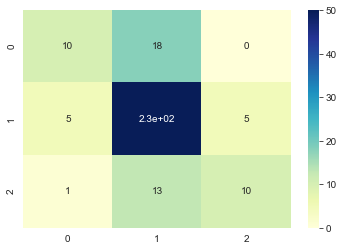

In [58]:
heatmap = sns.heatmap(team_attribute_confusion_matrix, vmax = 50, cmap="YlGnBu", annot = True)

Above is a visualization of the confusion matrix and we use the seaborn class to do it. We call the heatmap function and pass it the confusion matrix. We set the vmax to 50 so we can show an according color scale. I set the cmap parameter to "YlGnBu" to show a contrasting color scale and to make the visualization look nice. I got this cmap parameter from a seaborn documentation site, which I linked below in the Appendix of the Notebook.

Since we have overwhelming majority of balanced labels in our predictions and in our test set, we have to put a limit on the color scale in terms of number of predictions in the confusion matrix otherwise it will affect the color scale (as in the center being one color and the rest of the confusion matrix being another color with only two colors being shown in the entire matrix, making it look not the best). So we set the limit to 50 since no other number in our confusion matrix even gets close to that number other than number of correct "Balanced" predictions. I set the cmap parameter to "YlGnBu" so we can get a contrasting color set. 

Again we can see that we have the majority of our right predictions in the dead center. We also see that the lighter a color is, the less the value it is in the confusion matrix. So going row by row, we can see by the colors in the first and last row, we got more predictions wrong for those labels than we did right. 

### Cross Validation on entire data set

As one final measure, we decided to use 

In [59]:
from sklearn.model_selection import cross_val_score

In [78]:
min_max_scaler = preprocessing.MinMaxScaler().fit(team_attributes_nonTargetData)
team_nonTarget_normalized = min_max_scaler.transform(team_attributes_nonTargetData)
crossValidationScores = cross_val_score(knnclassifier, team_nonTarget_normalized, team_attributes_targetData, cv = 10)

crossValidationScores.mean()

0.8381152574397733

## Naive Bayes Classifier

Next we perform classification using a Naive Bayes classifier. Again the goal is to make accurate predictions based on the non-target and target attribute training set we pass to the classifier. We don't need normalization this time so there is no need to pass the normalized training and testing data sets. 

We create the Naive Bayes object by calling naive_bayes.GaussianNB(), we call this object nbclassifier. 

We then train the classifier on the training set by passing the training set, which we created beore we ran the KNN classifier. 

After training the Naive Bayes Classifier, we are now ready to make predictions. We call the predict function and pass it the test set of our non-target attribute data. 

We store these predictions in a variable called nbpreds_test

In [61]:
nbclassifer = naive_bayes.GaussianNB()
teamAttribute_nbclassiferFit = nbclassifer.fit(team_attribute_train, team_attribute_target_train)
nbpreds_test = teamAttribute_nbclassiferFit.predict(team_attribute_test)

Now that we have our predictions, it's time to see just how well our classifier was at being accurate with these said predictions. First thing we do is calcualte the accuracy score, which we do by calling the score function. 

In [62]:
print (teamAttribute_nbclassiferFit.score(team_attribute_test, team_attribute_target_test))

0.8356164383561644


As we can see, we get an 83 percent accuracy on the testing data, which is pretty good. This means we are getting over 80% of our predictions correct when we run it through the Naive Bayes classifier. 

Now we will calculate the score on the training data to see if we get a higher accuracy score on that (which we should)

In [63]:
print (teamAttribute_nbclassiferFit.score(team_attribute_train, team_attribute_target_train))

0.8481989708404802


So here we get an 84 percent accuracy function on the training data. This is good as well because not only do we get a higher accuracy on the training data than we do on the testing data, which is what is supposed to happen, but our accuracy shows that we only get 16 perecent of our predictions wrong when predicting on the training data. 

First let's take a look at how well we did predicting each individual category of our target attribute. We call the classification report() function to do this

In [64]:
print(classification_report(team_attribute_target_test, nbpreds_test))

              precision    recall  f1-score   support

    Balanced       0.93      0.87      0.90       240
        Fast       0.55      0.64      0.59        28
        Slow       0.51      0.75      0.61        24

    accuracy                           0.84       292
   macro avg       0.66      0.75      0.70       292
weighted avg       0.86      0.84      0.84       292



As we can see, we again did the best with the Balanced category. We get a precision of 0.93, recall of 0.87 and f1-score of 0.90. But this time, the Naive Bayes Classifier did better at predicting samples that were labeled as Fast in terms of precision score. But like with the KNN classifier, the slow category was more accurately predicted when it came to the recall and f1-score metric. Based on the F1-score, which combines recall and precision, we can say the order from most accurate to least accurate in terms of all 3 categorys are once again: 

1) Balanced 
2) Slow
3) Fast

But we want to take a look at the confusion matrix first to figure out just where the NB Classifier went wrong

Next, it's time to visualize our predictions via a Confusion Matrix. We want to see where exactly we got our predictions wrong. 

In [65]:
team_attribute_nb_tree_confusion_matrix = confusion_matrix(team_attribute_target_test, nbpreds_test, labels=['Fast','Balanced', 'Slow'])

In [66]:
print (team_attribute_nb_tree_confusion_matrix)

[[ 18  10   0]
 [ 15 208  17]
 [  0   6  18]]


Here we get much better prediction numbers from our Naive Bayes classifier as compared to that of K Nearest Neighbors. 
Looking at the predictions of the "Fast" label, we see that this time we get more correct predictions (18) than wrong ones (10). None of the "Fast" labels were inaccurately predicted as slow but 10 were predicted as Balanced. 

Once again, we see that balanced has the majority of the right predictions while also having the most number of labels. But it isn't prefect. We incorrectly predicted 28 samples that were supposed to be "Balanced" as something else. 

Again, like with the Fast label, the slow category was much better predicted using Naive Bayes than it was when we classified samples using K Nearest Neighbors. This time we get 18 correct predictions and only six wrong ones. This is much better to the numbers of KNN, which gave us 14 wrong predictions and only 10 correct ones for samples that were originally labeled as "Slow" for the target attribute. 

Again, we use the seaborn library to create our confusion matrix. I explained why I set the parameters of the heatmap() function earlier when I made the confusion matrix for the KNN classifier. 

I used the same methodology when setting the vmax parameter and the cmap parameter.

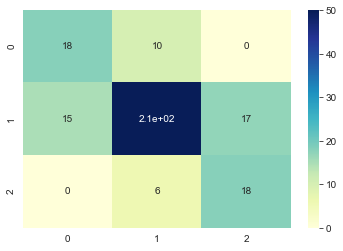

In [67]:
sns.heatmap(team_attribute_nb_tree_confusion_matrix, vmax = 50, cmap="YlGnBu", annot = True)

Like with the earlier visualization of the confusion matrix, the darker the color, the higher the number of predictions we made in that part of the confusion matrix. So we are looking for each row to have one spot darker than the rest of the squares in that given row. Preferably we like to see all of the darkest squares in the confusion matrix be in the main diagonal. 

That is exactly what see here. In a diagonal we see the darkest shade in a square is along the main diagonal. This shows to us that for each of the category labels, we made more right predictions than wrong ones. The color scheme of the diagonal shows us that much. this shows to us that the Naive Bayes classifier did a much better job of predicting the "buildUpPlaySpeed" attribute than that of K Nearest Neighbors. 

### Cross Validation on entire data set

In [77]:
crossValidationNB = cross_val_score(teamAttribute_nbclassiferFit, team_attributes_nonTargetData, team_attributes_targetData, cv = 5)

crossValidationNB.mean()

0.8312714776632302

### Takeaways from Classification Task

Overall, we felt that our classifiers did good jobs overall in terms of prediction accuracy for both as both K Nearest Neighbors and Naive Bayes got accuracy scores over 80 percent for the testing data. We do understand that part of the accuracy score being high is due to the fact that a lot of the samples had original labels of 'Balanced' and the number of those samples were a lot more than the two category levels of our target attribute. 

But when we took a deeper look at the actual prediction themselves as well as the metrics (recall, precision, F-1 score), we noticed that our K Nearest Neighbors classifier didn't do as well as we would have hoped in terms of making predictions for samples with original labels of "Fast" and "Slow". Our confusion matrix and it's subsequent visualization showed that much. 

However, our Naive Bayes Classifier did a good job in terms of accuracy (83 percent on the test set) and when we looked at the confusion matrix, we got a lot more correct predictions for each level of the target attribute. We can't say the same for our KNN classifier. 

So in all, we found that the Naive Bayes Classifier was a better fit for this data in terms of making correct predictions based on a categorical attribute which measured how quickly a team moved up field when building their attack. 

When we ran 10-fold cross-validation on both of these classifiers, we got mostly the same accuracy levels for both classifiers. KNN had slightly better mean accuracy at 83.8 as compared to the 83.1 but the difference in accuracy isn't enough for us to switch over and say that KNN is the better classifier. So looking at the confusion matrices of our test predictions along with the results of 10-fold cross validation, we can say that Naive Bayes is the better classifier 

## Conclusion
Overall we found this dataset to be one with a ton of avenues to explore in terms of data analysis.  We were able to determine which team improved the most in all of Europe over these nine seasons, which country saw the greatest increase of scoring of the big 5, and what teams had the greatest home and road scoring splits.  The multivariate regression model was able to accurately predict player overall off of player attributes with the main three in terms of predictive power being potential, reactions, and goalkeeper handling.  With a r-squared of 0.84 we can say we are very accurately predicting without worry of overfitting.  For our last task we were able to determine that for classifying build up play speed (Attacking style) that Naive Bayes classifier was the best in terms of predictions.  For further analysis of this dataset, someone with more advanced domain knowledge of soccer could try to build a predictive model for goals scored or try to quantify home field advantage.


## Appendix
Here is a list of packages we used to complete this project with the proper documentation.
Seaborn: https://seaborn.pydata.org/

SK Learn Mulitivariate Linear Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

SK Learn Confusion Matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

SK Learn Classification Report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

SK Learn Naive Bayes Classifier: https://scikit-learn.org/stable/modules/naive_bayes.html

SK Learn KNN Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

SQLite: https://sqlite.org/docs.html